## Instructions

1. **Labeling & Peer Grading:** Your homework will be peer graded. To stay anonymous, avoid using your name and label your file with the last four digits of your student ID (e.g., HW2_Solutions_3938).

2. **Submission:** Submit both your IPython notebook (.ipynb) and an HTML file of the notebook to Canvas under Assignments → HW 2 → Submit Assignment. After submitting, download and check the files to make sure that you've uploaded the correct versions. Both files are required for your HW to be graded.
3. 
 <font color='red'> No pdf file required so write all the details in your ipynb file.</font>
2. **AI Use Policy:** Solve each problem independently by yourself. Use AI tools like ChatGPT or Google Gemini for brainstorming and learning only—copying AI-generated content is prohibited. You do not neeViolations will lead to penalties, up to failing the course.

3. **Problem Structure:** <font color='red'>Break down each problem ( already done in most problems) into three interconnected parts and implement each in separate code cells. Ensure that each part logically builds on the previous one. Include comments in your code to explain its purpose, followed by a Markdown cell analyzing what was achieved. After completing all parts, add a final Markdown cell reflecting on your overall approach, discussing any challenges faced, and explaining how you utilized AI tools in your process.
</font>
4. **Deadlines & Academic Integrity:** This homework is due on 10/01/2024 at midnight. <font color='red'>Disclosure of this assignment and assignment answers to anyone or any website is a contributory infringement of academic dishonesty at ISU. Do not share or post course materials without the express written consent of the copyright holder and instructor. The class will follow Iowa State University’s policy on academic dishonesty. Anyone suspected of academic dishonesty will be reported to the Dean of Students Office.</font>

#### Each problem is worth 20 points. Total $\bf 20\times 5 = 100$.

### Problem 1. 
Upload the newimdb data and read the details on the columns about the data following the link https://www.imdb.com/interfaces/.
* Begin the data cleaning process by addressing duplicate entries in the dataset, with a particular focus on the 'category' and 'directors' columns. Remove any redundant rows and determine the best approach for handling variations within these columns. You may choose to either aggregate the diverse values into lists or select the most frequent entry for each instance; explain the reasoning behind your chosen method. Subsequently, identify and eliminate irrelevant columns, such as 'Unnamed: 0', which do not contribute meaningful information for regression or classification tasks. Provide a clear justification for the removal of each column, taking into account their potential significance in model development. Your explanation should demonstrate a thorough understanding of the dataset's structure and the relevance of each feature to the intended analysis.
* Analyze the dataset for missing values, particularly in columns like 'runtimeMinutes' and 'genres'. Determine whether to remove rows with missing data or impute values using appropriate statistical methods (mean, median, or mode), and justify your approach. For feature engineering, transform non-numerical columns such as 'genres' and 'directors' using one-hot encoding or label encoding techniques. Consider grouping genres into broader categories to potentially improve model performance. Provide clear explanations for your strategies in handling missing values and implementing feature engineering, ensuring your decisions are data-driven and aligned with the goals of the analysis.
  
* Conduct exploratory data analysis (EDA) on all remaining columns. Handle non-numerical values appropriately, convert data types as needed, and apply transformations or standardization where necessary. Implement dummy coding for categorical variables. For classification purposes, create a new 'Rating' column derived from 'averageRating'. Instead of using a predetermined scale, devise a binning strategy that results in a balanced class distribution across 5 rating categories (1 to 5 stars). Explain your chosen binning method and analyze the resulting distribution. Discuss how this balanced approach may impact your classification model's performance compared to using the original 'averageRating' values.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Config

In [2]:
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/MIS 546 - Advanced Business Analytics/Data/"
file_name = "newimdb.csv"

## Import dataset

In [3]:
imdb_df = pd.read_csv(data_loc + file_name)
print("Data dimensions: ", imdb_df.shape)
imdb_df.head(20)

Data dimensions:  (2795295, 14)


,Unnamed: 0,tconst,types,isOriginalTitle,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
0,6475881,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,editor,8.1,63.0
1,6475882,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actor,8.1,63.0
2,6475884,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actress,8.1,63.0
3,6475886,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,director,8.1,63.0
4,6475887,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,writer,8.1,63.0
5,6475889,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,composer,8.1,63.0
6,6475890,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,cinematographer,8.1,63.0
7,6475891,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,editor,8.1,63.0
8,6475892,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actor,8.1,63.0
9,6475894,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actress,8.1,63.0


## Data Exploration and Cleaning

In [4]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795295 entries, 0 to 2795294
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   tconst           object 
 2   types            object 
 3   isOriginalTitle  float64
 4   titleType        object 
 5   originalTitle    object 
 6   isAdult          float64
 7   startYear        int64  
 8   runtimeMinutes   object 
 9   genres           object 
 10  directors        object 
 11  category         object 
 12  averageRating    float64
 13  numVotes         float64
dtypes: float64(4), int64(2), object(8)
memory usage: 298.6+ MB


### Firt Movie Sample: 'Vazir'

In [5]:
imdb_df[imdb_df['originalTitle'] == 'Vazir']

,Unnamed: 0,tconst,types,isOriginalTitle,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
0,6475881,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,editor,8.1,63.0
1,6475882,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actor,8.1,63.0
2,6475884,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actress,8.1,63.0
3,6475886,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,director,8.1,63.0
4,6475887,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,writer,8.1,63.0
5,6475889,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,composer,8.1,63.0
6,6475890,tt0111596,imdbDisplay,0.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,cinematographer,8.1,63.0
7,6475891,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,editor,8.1,63.0
8,6475892,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actor,8.1,63.0
9,6475894,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actress,8.1,63.0


### Obs.:
In the above sample, all observations point to the same movie, but there are different title types in `types` column that only impact the binary `isOriginalTitle` column, which indicates whether the title is original. This variation doesn't seem to affect any other features. I will further explore this hypothesis using additional examples.

In [6]:
imdb_df['types'].value_counts()

types
original                1080513
imdbDisplay             1055184
\N                       395137
alternative               85040
working                   73868
festival                  42436
dvd                       36697
tv                        21941
video                      3283
dvdimdbDisplay             823
festivalimdbDisplay        142
imdbDisplaytv              103
imdbDisplayworking          46
imdbDisplayvideo            26
alternativedvd              20
alternativetv               13
alternativeworking          13
videoworking                 8
alternativefestival          2
Name: count, dtype: int64

In [7]:
imdb_df['titleType'].value_counts()

titleType
movie           1549698
short            659811
tvMovie          195005
tvSeries         187470
video            112483
videoGame         33181
tvMiniSeries      27829
tvSpecial         23492
tvShort            5360
tvEpisode           966
Name: count, dtype: int64

In [8]:
imdb_df[imdb_df['types'] == 'alternative']

,Unnamed: 0,tconst,types,isOriginalTitle,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
60,6961780,tt0118652,alternative,0.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,composer,4.9,1850.0
61,6961781,tt0118652,alternative,0.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,actor,4.9,1850.0
62,6961784,tt0118652,alternative,0.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,actress,4.9,1850.0
63,6961785,tt0118652,alternative,0.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,director,4.9,1850.0
64,6961786,tt0118652,alternative,0.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,writer,4.9,1850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795262,32998206,tt9916362,alternative,0.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,actress,6.4,5179.0
2795263,32998207,tt9916362,alternative,0.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,actor,6.4,5179.0
2795264,32998210,tt9916362,alternative,0.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,director,6.4,5179.0
2795265,32998211,tt9916362,alternative,0.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,writer,6.4,5179.0


In [9]:
imdb_df.iloc[0,8]

'\\N'

In [10]:
imdb_df[imdb_df['types'] == '\\N']

,Unnamed: 0,tconst,types,isOriginalTitle,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
21,6955488,tt0118589,\N,0.0,movie,Glitter,0.0,2001,104,"Drama,Music,Romance",nm0193554,cinematographer,2.4,23686.0
22,6955489,tt0118589,\N,0.0,movie,Glitter,0.0,2001,104,"Drama,Music,Romance",nm0193554,actress,2.4,23686.0
23,6955490,tt0118589,\N,0.0,movie,Glitter,0.0,2001,104,"Drama,Music,Romance",nm0193554,actor,2.4,23686.0
24,6955493,tt0118589,\N,0.0,movie,Glitter,0.0,2001,104,"Drama,Music,Romance",nm0193554,director,2.4,23686.0
25,6955494,tt0118589,\N,0.0,movie,Glitter,0.0,2001,104,"Drama,Music,Romance",nm0193554,writer,2.4,23686.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795280,32998342,tt9916538,\N,0.0,movie,Kuambil Lagi Hatiku,0.0,2019,123,Drama,nm4457074,actress,8.3,6.0
2795281,32998344,tt9916538,\N,0.0,movie,Kuambil Lagi Hatiku,0.0,2019,123,Drama,nm4457074,actor,8.3,6.0
2795282,32998346,tt9916538,\N,0.0,movie,Kuambil Lagi Hatiku,0.0,2019,123,Drama,nm4457074,director,8.3,6.0
2795283,32998347,tt9916538,\N,0.0,movie,Kuambil Lagi Hatiku,0.0,2019,123,Drama,nm4457074,writer,8.3,6.0


In [11]:
imdb_df[imdb_df['originalTitle'] == 'The Attic Expeditions']

,Unnamed: 0,tconst,types,isOriginalTitle,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
42,6961650,tt0118652,imdbDisplay,0.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,composer,4.9,1850.0
43,6961651,tt0118652,imdbDisplay,0.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,actor,4.9,1850.0
44,6961654,tt0118652,imdbDisplay,0.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,actress,4.9,1850.0
45,6961655,tt0118652,imdbDisplay,0.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,director,4.9,1850.0
46,6961656,tt0118652,imdbDisplay,0.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,writer,4.9,1850.0
47,6961657,tt0118652,imdbDisplay,0.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,producer,4.9,1850.0
48,6961680,tt0118652,original,1.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,composer,4.9,1850.0
49,6961681,tt0118652,original,1.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,actor,4.9,1850.0
50,6961684,tt0118652,original,1.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,actress,4.9,1850.0
51,6961685,tt0118652,original,1.0,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,director,4.9,1850.0


In [12]:
imdb_df[imdb_df['originalTitle'] == 'Akelarre']

,Unnamed: 0,tconst,types,isOriginalTitle,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
2795249,32998075,tt9916362,imdbDisplay,0.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,composer,6.4,5179.0
2795250,32998076,tt9916362,imdbDisplay,0.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,actress,6.4,5179.0
2795251,32998077,tt9916362,imdbDisplay,0.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,actor,6.4,5179.0
2795252,32998080,tt9916362,imdbDisplay,0.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,director,6.4,5179.0
2795253,32998081,tt9916362,imdbDisplay,0.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,writer,6.4,5179.0
2795254,32998082,tt9916362,imdbDisplay,0.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,producer,6.4,5179.0
2795255,32998125,tt9916362,original,1.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,composer,6.4,5179.0
2795256,32998126,tt9916362,original,1.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,actress,6.4,5179.0
2795257,32998127,tt9916362,original,1.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,actor,6.4,5179.0
2795258,32998130,tt9916362,original,1.0,movie,Akelarre,0.0,2020,92,"Drama,History",nm1893148,director,6.4,5179.0


### Obs.:
Based on the above samples/exploration, I identified a consistent pattern where each media entry has an original type along with variants that do not affect the averageRating or numVotes. It repeats the the category over for each unique value in `types`, which is redundant. I will keep only records for one type in `types` column, as the variants provide no additional value to the analysis. After removing all records and will drop the `types` and `isOriginalTitle` columns as we not longer need them.

In [13]:
# Checking the number of unique titles before the cleaning to make sure we don't lose data
nunique_titles = imdb_df['originalTitle'].nunique()
print("Number of unique titles: ", nunique_titles)

Number of unique titles:  229522


In [14]:
# Removing all observations that are not the original
imdb_original = imdb_df[(imdb_df['types'] == "original") | (imdb_df['types'] == "tv")]

# Checking the number of unique titles after the cleaning to make sure we don't lose data
nunique_imdb_original = imdb_original['originalTitle'].nunique()

# Dataset after trasformation
print("Data dimensions: ", imdb_original.shape)
print("Number of unique titles: ", nunique_imdb_original)
imdb_original.head()

Data dimensions:  (1102454, 14)
Number of unique titles:  207981


,Unnamed: 0,tconst,types,isOriginalTitle,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
7,6475891,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,editor,8.1,63.0
8,6475892,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actor,8.1,63.0
9,6475894,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actress,8.1,63.0
10,6475896,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,director,8.1,63.0
11,6475897,tt0111596,original,1.0,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,writer,8.1,63.0


### Obs.:

We did lost some midias that did not have original titles. Let's look at them below.

In [15]:
print("Number of records reduce was: ", imdb_df.shape[0] - imdb_original.shape[0])
print("Number of unique titles lost was: ", nunique_titles - nunique_imdb_original)

Number of records reduce was:  1692841
Number of unique titles lost was:  21541


### Obs.:

Let's go after the lost records.

In [16]:
# List o unique titles after the cleaning
orig_titles = imdb_original['originalTitle'].unique()

# Movies that don't have original title and therefore are not in the the dataset after the cleaning
movies_no_orig = imdb_df[~(imdb_df['originalTitle'].isin(orig_titles))]

# Checking the number of unique titles that are not in the cleaned df
nunique_movies_no_orig = movies_no_orig['originalTitle'].nunique()

# Dataset after trasformation
print("Data dimensions: ", movies_no_orig.shape)
print("Number of unique titles: ", nunique_movies_no_orig)
movies_no_orig.head()

Data dimensions:  (95880, 14)
Number of unique titles:  21541


,Unnamed: 0,tconst,types,isOriginalTitle,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
409,7702551,tt0144449,\N,0.0,movie,Nema aviona za Zagreb,0.0,2012,82,Biography,nm0309428,cinematographer,8.2,8.0
410,7702552,tt0144449,\N,0.0,movie,Nema aviona za Zagreb,0.0,2012,82,Biography,nm0309428,archive_footage,8.2,8.0
411,7702555,tt0144449,\N,0.0,movie,Nema aviona za Zagreb,0.0,2012,82,Biography,nm0309428,writer,8.2,8.0
412,7702556,tt0144449,\N,0.0,movie,Nema aviona za Zagreb,0.0,2012,82,Biography,nm0309428,producer,8.2,8.0
1011,8274579,tt0176001,\N,0.0,movie,Panic Bodies,0.0,2003,70,Documentary,nm0393682,actor,7.0,12.0


### Obs.:

The unique values match the 21,541 movies that were indentified as missing after selecting the original titles. Let's recover them.

In [17]:
## Get missing movies
titles_N= movies_no_orig[movies_no_orig['types'] == '\\N']

# Checking the number of unique titles that are not in the cleaned df
nunique_titles_N= titles_N['originalTitle'].nunique()

# Dataset after trasformation
print("Data dimensions: ", titles_N.shape)
print("Number of unique titles: ", nunique_titles_N)
titles_N.head()

Data dimensions:  (95332, 14)
Number of unique titles:  21507


,Unnamed: 0,tconst,types,isOriginalTitle,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
409,7702551,tt0144449,\N,0.0,movie,Nema aviona za Zagreb,0.0,2012,82,Biography,nm0309428,cinematographer,8.2,8.0
410,7702552,tt0144449,\N,0.0,movie,Nema aviona za Zagreb,0.0,2012,82,Biography,nm0309428,archive_footage,8.2,8.0
411,7702555,tt0144449,\N,0.0,movie,Nema aviona za Zagreb,0.0,2012,82,Biography,nm0309428,writer,8.2,8.0
412,7702556,tt0144449,\N,0.0,movie,Nema aviona za Zagreb,0.0,2012,82,Biography,nm0309428,producer,8.2,8.0
1011,8274579,tt0176001,\N,0.0,movie,Panic Bodies,0.0,2003,70,Documentary,nm0393682,actor,7.0,12.0


In [18]:
print("Still missing {} movies" .format(nunique_movies_no_orig - nunique_titles_N))

Still missing 34 movies


In [19]:
movies_no_orig['types'].unique()

array(['\\N', 'imdbDisplay', 'working', 'dvd', 'festival', 'alternative',
       'video'], dtype=object)

In [20]:
# List o unique titles after removing original and nulls
last_list = titles_N['originalTitle'].unique()

# Movies that are missing
movies_no_orig_null = movies_no_orig[~(movies_no_orig['originalTitle'].isin(last_list))]

# Checking the number of unique titles that are not in the cleaned df
nunique_missing = movies_no_orig_null['originalTitle'].nunique()

# Display
print("Number of unique titles: ", nunique_missing)

Number of unique titles:  34


In [21]:
movies_no_orig_null['types'].unique()

array(['imdbDisplay', 'working', 'alternative', 'festival'], dtype=object)

In [22]:
# Get last 34 movies
titles_imdb = movies_no_orig_null[movies_no_orig_null['types'] == 'imdbDisplay']

# Confirm the unique count
nunique_titles_imdb = titles_imdb['originalTitle'].nunique()

# Dataset after trasformation
print("Data dimensions: ", titles_imdb.shape)
print("Number of unique titles: ", nunique_titles_imdb)
titles_imdb.head()

Data dimensions:  (161, 14)
Number of unique titles:  34


,Unnamed: 0,tconst,types,isOriginalTitle,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
25495,10485760,tt0315056,imdbDisplay,0.0,tvSeries,Saia Justa,0.0,2002,60,Talk-Show,"nm11597242,nm1381005,nm1166794",self,6.7,29.0
59030,11239400,tt0371599,imdbDisplay,0.0,movie,Ein Goldfisch unter Haien,0.0,2004,90,"Comedy,Romance",nm0090596,composer,6.7,32.0
59031,11239401,tt0371599,imdbDisplay,0.0,movie,Ein Goldfisch unter Haien,0.0,2004,90,"Comedy,Romance",nm0090596,actress,6.7,32.0
59032,11239403,tt0371599,imdbDisplay,0.0,movie,Ein Goldfisch unter Haien,0.0,2004,90,"Comedy,Romance",nm0090596,actor,6.7,32.0
59033,11239405,tt0371599,imdbDisplay,0.0,movie,Ein Goldfisch unter Haien,0.0,2004,90,"Comedy,Romance",nm0090596,director,6.7,32.0


### Obs.:
It got a little confusing, but at this point, we can significantly reduce the volume and redundancy of the data without loosing any significant information. Let's now consolidate the dasets and get all 229,522 initial count of unique titles.

In [46]:
# Concatenanting all datasets
imdb_clean = pd.concat([imdb_original, titles_N, titles_imdb], ignore_index=True)

# Removing unecessary columns
imdb_clean = imdb_clean.drop(columns=['Unnamed: 0', 'types', 'isOriginalTitle'])

# Confirm the unique count
nunique_imdb_clean = imdb_clean['originalTitle'].nunique()

# Dataset after trasformation
print("Data dimensions: ", imdb_clean.shape)
print("Number of unique titles: ", nunique_imdb_clean)
imdb_clean.head()

Data dimensions:  (1197947, 11)
Number of unique titles:  229522


,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,category,averageRating,numVotes
0,tt0111596,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,editor,8.1,63.0
1,tt0111596,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actor,8.1,63.0
2,tt0111596,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,actress,8.1,63.0
3,tt0111596,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,director,8.1,63.0
4,tt0111596,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,writer,8.1,63.0


In [47]:
print("Number of records reduced was: ", imdb_df.shape[0] - imdb_clean.shape[0])
print("Number of unique titles lost was: ", nunique_titles - nunique_imdb_clean)

Number of records reduced was:  1597348
Number of unique titles lost was:  0


### Obs.:
From the above line, we can see the number of records was significantly reduced without loosing any unique title. \

Moving forward, I still see an opportunity to reduce redundancy further in the dataset. I believe we can have one record per midia if we one-hot encode the `category` column.

In [48]:
print("We will have {} more columns in the dataset." .format(imdb_clean['category'].nunique() - 2))

We will have 10 more columns in the dataset.


In [49]:
# One-hot encode the 'category' column
imdb_one_hot = pd.get_dummies(imdb_clean, columns=['category'], drop_first=True, dtype=int)

# Group by movie identifiers and aggregate numeric columns
imdb_grouped = imdb_one_hot.groupby(
    ['tconst', 'titleType', 'originalTitle', 'isAdult', 'startYear', 'runtimeMinutes', 'genres', 'directors'],
    as_index=False
).agg({
    'averageRating': 'mean',
    'numVotes': 'mean',     
    **{col: 'sum' for col in imdb_one_hot.columns if col.startswith(('category_'))}
})

# Remove the "category_" prefix from the one-hot encoded column names
imdb_grouped.columns = imdb_grouped.columns.str.replace('category_', '')

# Dataset after transformation
print("Data dimensions: ", imdb_grouped.shape)
print("Number of unique titles: ", imdb_grouped['originalTitle'].nunique())
imdb_grouped.head()


Data dimensions:  (252763, 21)
Number of unique titles:  229522


,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,averageRating,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,tt0111596,movie,Vazir,0.0,2015,\N,"Action,Crime,Drama",nm13648797,8.1,63.0,1,0,0,1,1,1,1,0,0,0,1
1,tt0118589,movie,Glitter,0.0,2001,104,"Drama,Music,Romance",nm0193554,2.4,23686.0,1,0,0,1,1,1,0,1,0,0,1
2,tt0118652,movie,The Attic Expeditions,0.0,2001,100,"Comedy,Horror,Mystery",nm0440948,4.9,1850.0,1,0,0,0,1,1,0,1,0,0,1
3,tt0121164,movie,Corpse Bride,0.0,2005,77,"Animation,Drama,Family","nm0000318,nm0425843",7.3,279860.0,1,0,0,0,0,1,0,0,0,0,1
4,tt0121389,short,"I, an Actress",0.0,2005,10,Short,nm0473647,6.0,343.0,1,0,0,1,0,0,0,0,0,0,0


In [50]:
imdb_grouped[imdb_grouped['originalTitle'].duplicated()]

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,averageRating,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer
986,tt0292190,videoGame,Planet of the Apes,0.0,2001,\N,"Action,Adventure,Sci-Fi",\N,5.3,100.0,1,0,0,0,1,0,0,0,0,0,1
1013,tt0292508,movie,Fidel,0.0,2001,91,"Biography,Documentary",nm0106073,7.5,558.0,0,0,0,2,2,2,0,2,0,2,0
1300,tt0303354,movie,Killing Time,0.0,2002,81,\N,nm1097510,5.9,60.0,1,0,0,0,1,1,1,1,1,0,0
1412,tt0303938,movie,Dust,0.0,2001,90,"Comedy,Horror,Thriller",nm0556573,4.6,98.0,1,0,0,1,1,1,1,0,0,0,0
1521,tt0315355,movie,The Calling,0.0,2002,117,"Drama,Family",nm1161445,7.2,13.0,1,0,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252737,tt9913936,movie,Paradise,0.0,2019,135,"Crime,Drama",nm10091596,7.5,59.0,0,0,0,1,0,0,0,0,0,0,0
252742,tt9914642,movie,Albatross,0.0,2017,97,Documentary,nm5300859,8.3,42.0,0,0,0,1,0,1,0,0,0,0,1
252748,tt9915138,tvSeries,Scandalous,0.0,2018,60,"Crime,Documentary",nm7710846,6.6,11.0,0,0,0,0,0,0,0,0,0,1,0
252753,tt9916038,short,Eco,0.0,2019,14,"Drama,Short",nm1517212,6.4,15.0,1,0,0,1,1,1,0,1,0,0,1


In [51]:
imdb_grouped[imdb_grouped['originalTitle'] == 'Planet of the Apes']

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,averageRating,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer
10,tt0133152,movie,Planet of the Apes,0.0,2001,119,"Action,Adventure,Sci-Fi",nm0000318,5.7,221998.0,1,0,0,0,0,1,0,1,0,0,1
986,tt0292190,videoGame,Planet of the Apes,0.0,2001,\N,"Action,Adventure,Sci-Fi",\N,5.3,100.0,1,0,0,0,1,0,0,0,0,0,1


### Obs.:

Now that we got to the point of one record per movie, we can explore ways of working with `genres`, `directors`, and `titleType`, which are categorical columns.

### `genres`

Here, I'll create a numeric mapping for genres and split the genres into up to three columns (genre1, genre2, genre3), each representing a unique numeric value for a genre. If a movie had less than three genres, the remaining columns were filled with 0. If it has more, I will just use the first 3.

In [52]:
# Split the genres string by commas and explode the resulting list into individual rows
genres_split = imdb_grouped['genres'].str.split(',')

# Flatten the list of genres and get unique values
unique_genres = pd.Series([genre.strip() for sublist in genres_split for genre in sublist]).unique()

# Display the unique genres
print(unique_genres)

['Action' 'Crime' 'Drama' 'Music' 'Romance' 'Comedy' 'Horror' 'Mystery'
 'Animation' 'Family' 'Short' 'Adventure' 'Fantasy' 'Thriller' 'Sci-Fi'
 'Documentary' '\\N' 'Biography' 'Sport' 'History' 'War' 'Western'
 'Musical' 'Talk-Show' 'Adult' 'Reality-TV' 'Game-Show' 'News']


In [53]:
# Create a mapping of genres to numeric values
genre_mapping = {
    'Null': 0, 'Action': 1, 'Crime': 2, 'Drama': 3, 'Music': 4, 'Romance': 5, 'Comedy': 6,
    'Horror': 7, 'Mystery': 8, 'Animation': 9, 'Family': 10, 'Short': 11, 'Adventure': 12,
    'Fantasy': 13, 'Thriller': 14, 'Sci-Fi': 15, 'Documentary': 16, 'Biography': 17, 'Sport': 18,
    'History': 19, 'War': 20, 'Western': 21, 'Musical': 22, 'Talk-Show': 23, 'Adult': 24,
    'Reality-TV': 25, 'Game-Show': 26, 'News': 27, '\\N': 0
}

# Create a function to split genres and assign numeric values to new columns
def assign_genres(genres_list):
    # Split the genres and map to numbers
    mapped_genres = [genre_mapping[genre.strip()] for genre in genres_list if genre in genre_mapping]
    
    # Assign up to 3 genres (fill with 0 if there are fewer than 3 genres)
    return mapped_genres[:3] + [0] * (3 - len(mapped_genres))

# Apply the function to create new genre columns
imdb_grouped[['genre1', 'genre2', 'genre3']] = imdb_grouped['genres'].str.split(',').apply(assign_genres).apply(pd.Series)

# Display the transformed data
imdb_grouped[['genres', 'genre1', 'genre2', 'genre3']]

,genres,genre1,genre2,genre3
0,"Action,Crime,Drama",1,2,3
1,"Drama,Music,Romance",3,4,5
2,"Comedy,Horror,Mystery",6,7,8
3,"Animation,Drama,Family",9,3,10
4,Short,11,0,0
...,...,...,...,...
252758,Thriller,14,0,0
252759,"Drama,History",3,19,0
252760,Comedy,6,0,0
252761,Drama,3,0,0


### `directors`

Here, I will split the directors column by removing the 'nm' prefix and create two columns (director1, director2). If only one director was listed, the second column was set to 0. Missing values ('\\N') were handled by assigning 0.

In [54]:
# Create a function to process the directors column
def assign_directors(directors_list):
    # Remove 'nm' prefix and split by commas
    processed_directors = [int(director.strip().replace('nm', '')) if director != '\\N' else 0 for director in directors_list.split(',')]
    
    # Assign up to 2 directors and fill with 0 if there is only one director
    return processed_directors[:2] + [0] * (2 - len(processed_directors))

# Apply the function to create new director columns
imdb_grouped[['director1', 'director2']] = imdb_grouped['directors'].apply(assign_directors).apply(pd.Series).astype(int)

# Display the transformed data
imdb_grouped[['directors', 'director1', 'director2']].head()


,directors,director1,director2
0,nm13648797,13648797,0
1,nm0193554,193554,0
2,nm0440948,440948,0
3,"nm0000318,nm0425843",318,425843
4,nm0473647,473647,0


### `titleType`

Here, I will map each unique value in the titleType column to a corresponding numeric value using a dictionary, and create a new column (titleType_encoded) for this numeric column.

In [55]:
imdb_grouped['titleType'].unique()

array(['movie', 'short', 'video', 'tvMovie', 'tvMiniSeries', 'tvSeries',
       'videoGame', 'tvSpecial', 'tvShort', 'tvEpisode'], dtype=object)

In [56]:
# Create a mapping of titleType to numeric values
titleType_mapping = {
    'movie': 1,
    'short': 2,
    'video': 3,
    'tvMovie': 4,
    'tvMiniSeries': 5,
    'tvSeries': 6,
    'videoGame': 7,
    'tvSpecial': 8,
    'tvShort': 9,
    'tvEpisode': 10
}

# Apply the mapping to the 'titleType' column
imdb_grouped['titleType_encoded'] = imdb_grouped['titleType'].map(titleType_mapping)

# Display the transformed data
imdb_grouped[['titleType', 'titleType_encoded']].head()


,titleType,titleType_encoded
0,movie,1
1,movie,1
2,movie,1
3,movie,1
4,short,2


### Find and fill null values

### `runtimeMinutes`

Here, I will fill null values in `runtimeMinutes` with the average runtime per title in `titleType` column.

In [57]:
imdb_grouped['runtimeMinutes'].value_counts()

runtimeMinutes
\N     43683
90      9680
60      6489
30      5156
15      4832
       ...  
311        1
413        1
624        1
529        1
462        1
Name: count, Length: 546, dtype: int64

In [58]:
# Get average runtime for each title type
imdb_grouped['runtimeMinutes'] = np.where(imdb_grouped['runtimeMinutes'] == '\\N', np.nan, imdb_grouped['runtimeMinutes']).astype(float)
avg_runtime = imdb_grouped.dropna()
avg_runtime = avg_runtime.groupby(['titleType']).agg(runtimeMinutes_avg=('runtimeMinutes', 'mean')).reset_index()
avg_runtime.head()

,titleType,runtimeMinutes_avg
0,movie,95.903562
1,short,15.353863
2,tvEpisode,68.024096
3,tvMiniSeries,105.786276
4,tvMovie,80.757631


In [59]:
# Filling Null values
imdb_merged = imdb_grouped.merge(avg_runtime, on=['titleType'], how='left')
imdb_merged['runtimeMinutes'] = np.where(imdb_merged['runtimeMinutes'].isna(), imdb_merged['runtimeMinutes_avg'], imdb_merged['runtimeMinutes'])
imdb_merged[imdb_merged['runtimeMinutes'].isna()]

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,averageRating,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer,genre1,genre2,genre3,director1,director2,titleType_encoded,runtimeMinutes_avg


In [60]:
imdb_merged

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,averageRating,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer,genre1,genre2,genre3,director1,director2,titleType_encoded,runtimeMinutes_avg
0,tt0111596,movie,Vazir,0.0,2015,95.903562,"Action,Crime,Drama",nm13648797,8.1,63.0,1,0,0,1,1,1,1,0,0,0,1,1,2,3,13648797,0,1,95.903562
1,tt0118589,movie,Glitter,0.0,2001,104.000000,"Drama,Music,Romance",nm0193554,2.4,23686.0,1,0,0,1,1,1,0,1,0,0,1,3,4,5,193554,0,1,95.903562
2,tt0118652,movie,The Attic Expeditions,0.0,2001,100.000000,"Comedy,Horror,Mystery",nm0440948,4.9,1850.0,1,0,0,0,1,1,0,1,0,0,1,6,7,8,440948,0,1,95.903562
3,tt0121164,movie,Corpse Bride,0.0,2005,77.000000,"Animation,Drama,Family","nm0000318,nm0425843",7.3,279860.0,1,0,0,0,0,1,0,0,0,0,1,9,3,10,318,425843,1,95.903562
4,tt0121389,short,"I, an Actress",0.0,2005,10.000000,Short,nm0473647,6.0,343.0,1,0,0,1,0,0,0,0,0,0,0,11,0,0,473647,0,2,15.353863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252758,tt9916270,movie,Il talento del calabrone,0.0,2020,84.000000,Thriller,nm1480867,5.8,1393.0,1,0,0,1,1,1,0,1,0,0,1,14,0,0,1480867,0,1,95.903562
252759,tt9916362,movie,Akelarre,0.0,2020,92.000000,"Drama,History",nm1893148,6.4,5179.0,1,0,0,0,1,1,0,1,0,0,1,3,19,0,1893148,0,1,95.903562
252760,tt9916460,tvMovie,Pink Taxi,0.0,2019,80.757631,Comedy,nm7048843,9.4,18.0,1,0,0,1,0,1,0,0,0,0,0,6,0,0,7048843,0,4,80.757631
252761,tt9916538,movie,Kuambil Lagi Hatiku,0.0,2019,123.000000,Drama,nm4457074,8.3,6.0,1,0,0,0,1,1,0,1,0,0,1,3,0,0,4457074,0,1,95.903562


### `numVotes`

No null values found.

In [61]:
imdb_merged[imdb_merged['numVotes'] == '\\N']

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,averageRating,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer,genre1,genre2,genre3,director1,director2,titleType_encoded,runtimeMinutes_avg


In [62]:
imdb_merged[imdb_merged['numVotes'].isna()]

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,averageRating,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer,genre1,genre2,genre3,director1,director2,titleType_encoded,runtimeMinutes_avg


### `startYear`
No null values found.

In [63]:
imdb_merged[imdb_merged['startYear'].isna()]

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,averageRating,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer,genre1,genre2,genre3,director1,director2,titleType_encoded,runtimeMinutes_avg


In [64]:
imdb_merged['startYear'].value_counts()

startYear
2016    16411
2017    15878
2015    15711
2013    15323
2014    15120
2012    15035
2011    14496
2018    13794
2010    13454
2019    13097
2021    12870
2009    12868
2020    12750
2008    11462
2022    11308
2007    10088
2006     9558
2005     7534
2004     5409
2003     4295
2002     3075
2001     2457
2023      770
Name: count, dtype: int64

### Create `rating` column derived from `averageRating`

To classify movies into 5 star-based rating categories, I applied quantile-based binning to the averageRating column since averageRating is a continuous variable amd cannot be used directly in a classification model. This approach divides the data into five groups of similar size, with each bin representing about 20% of the ratings. By using quantiles, the process ensures that each category contains a similar number of movies, resulting in a balanced distribution. This approach may improve the model’s performance by preventing bias toward overrepresented ratings and makes the data suitable for classification.

In [65]:
# Analyze the distribution of averageRating
imdb_merged['averageRating'].describe()

count    252763.000000
mean          6.652431
std           1.518086
min           1.000000
25%           5.800000
50%           6.800000
75%           7.700000
max          10.000000
Name: averageRating, dtype: float64

In [72]:
# Create a new rating column using quantile-based binning
imdb_merged['rating'], bin_edges = pd.qcut(imdb_merged['averageRating'], q=5, labels=[1, 2, 3, 4, 5], retbins=True)
imdb_merged['rating'] = imdb_merged['rating'].astype(int)

# Display the bin edges (ranges)
print("Stars average ratings range: ")
for i in range(1, len(bin_edges)):
    print(f"{i} star: {bin_edges[i-1]:.2f} to {bin_edges[i]:.2f}")

print("")

# Check the distribution of the new rating column
print("New rating distribution: ")
print(imdb_merged['rating'].value_counts())

Stars average ratings range: 
1 star: 1.00 to 5.50
2 star: 5.50 to 6.40
3 star: 6.40 to 7.10
4 star: 7.10 to 7.90
5 star: 7.90 to 10.00

New rating distribution: 
rating
1    53403
4    50778
5    50101
3    49547
2    48934
Name: count, dtype: int64


### Removing unecessary columns

In [73]:
imdb_merged.head()

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,averageRating,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer,genre1,genre2,genre3,director1,director2,titleType_encoded,runtimeMinutes_avg,rating
0,tt0111596,movie,Vazir,0.0,2015,95.903562,"Action,Crime,Drama",nm13648797,8.1,63.0,1,0,0,1,1,1,1,0,0,0,1,1,2,3,13648797,0,1,95.903562,5
1,tt0118589,movie,Glitter,0.0,2001,104.000000,"Drama,Music,Romance",nm0193554,2.4,23686.0,1,0,0,1,1,1,0,1,0,0,1,3,4,5,193554,0,1,95.903562,1
2,tt0118652,movie,The Attic Expeditions,0.0,2001,100.000000,"Comedy,Horror,Mystery",nm0440948,4.9,1850.0,1,0,0,0,1,1,0,1,0,0,1,6,7,8,440948,0,1,95.903562,1
3,tt0121164,movie,Corpse Bride,0.0,2005,77.000000,"Animation,Drama,Family","nm0000318,nm0425843",7.3,279860.0,1,0,0,0,0,1,0,0,0,0,1,9,3,10,318,425843,1,95.903562,4
4,tt0121389,short,"I, an Actress",0.0,2005,10.000000,Short,nm0473647,6.0,343.0,1,0,0,1,0,0,0,0,0,0,0,11,0,0,473647,0,2,15.353863,2


In [74]:
# Removing unecessary columns
imdb_final = imdb_merged.drop(columns=['tconst', 'originalTitle', 'titleType', 'genres', 'directors', 'runtimeMinutes_avg'])
imdb_final

,isAdult,startYear,runtimeMinutes,averageRating,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer,genre1,genre2,genre3,director1,director2,titleType_encoded,rating
0,0.0,2015,95.903562,8.1,63.0,1,0,0,1,1,1,1,0,0,0,1,1,2,3,13648797,0,1,5
1,0.0,2001,104.000000,2.4,23686.0,1,0,0,1,1,1,0,1,0,0,1,3,4,5,193554,0,1,1
2,0.0,2001,100.000000,4.9,1850.0,1,0,0,0,1,1,0,1,0,0,1,6,7,8,440948,0,1,1
3,0.0,2005,77.000000,7.3,279860.0,1,0,0,0,0,1,0,0,0,0,1,9,3,10,318,425843,1,4
4,0.0,2005,10.000000,6.0,343.0,1,0,0,1,0,0,0,0,0,0,0,11,0,0,473647,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252758,0.0,2020,84.000000,5.8,1393.0,1,0,0,1,1,1,0,1,0,0,1,14,0,0,1480867,0,1,2
252759,0.0,2020,92.000000,6.4,5179.0,1,0,0,0,1,1,0,1,0,0,1,3,19,0,1893148,0,1,2
252760,0.0,2019,80.757631,9.4,18.0,1,0,0,1,0,1,0,0,0,0,0,6,0,0,7048843,0,4,5
252761,0.0,2019,123.000000,8.3,6.0,1,0,0,0,1,1,0,1,0,0,1,3,0,0,4457074,0,1,5


In [75]:
imdb_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252763 entries, 0 to 252762
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isAdult              252763 non-null  float64
 1   startYear            252763 non-null  int64  
 2   runtimeMinutes       252763 non-null  float64
 3   averageRating        252763 non-null  float64
 4   numVotes             252763 non-null  float64
 5   actress              252763 non-null  int64  
 6   archive_footage      252763 non-null  int64  
 7   archive_sound        252763 non-null  int64  
 8   cinematographer      252763 non-null  int64  
 9   composer             252763 non-null  int64  
 10  director             252763 non-null  int64  
 11  editor               252763 non-null  int64  
 12  producer             252763 non-null  int64  
 13  production_designer  252763 non-null  int64  
 14  self                 252763 non-null  int64  
 15  writer           

### Export clean data

In [76]:
file_name = "newimdb_clean.csv"

imdb_final.to_csv(data_loc + file_name, index=False)

### Problem 2.  
You will make regression models here using the cleaned data from problem 1. Use averageRating as the target variable for this problem.
* Begin by selecting five advanced machine learning models for multiple linear/nonlinear regression, excluding basic models like OLS, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM. Determine appropriate test size and validation method, providing a clear rationale for your choices. Split your data into training and testing sets based on these decisions. Use 'averageRating' as your target variable and preprocess your feature set as required by your selected models.
  
* Implement each of your five chosen regression models using the prepared data. Train each model on the training set and generate predictions for the test set. Create a dataframe that combines the predictions from all five models for the test data, and display the first few rows of this dataframe.
  
* Evaluate the performance of all five models by calculating the Root Mean Square Error (RMSE) and R-squared values for both the training and testing data. Present these metrics in a clear, tabular format for easy comparison. Based on these results, select the best-performing model and provide a detailed explanation for your choice. Finally, critically assess whether your best model is suitable for production use. Discuss its strengths and limitations, and propose specific strategies or techniques you would employ to further improve the model's performance.

### Import Libraries

In [1]:
# Standards
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Data prep for modeling
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


# Modeling
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, plot_importance
from catboost import CatBoostRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

2024-09-28 22:15:53.779991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Config

In [2]:
# Data location
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/MIS 546 - Advanced Business Analytics/Data/"
file_name = "newimdb_clean.csv"

### Import Clean Dataset

In [3]:
# Import dataset
clean_df = pd.read_csv(data_loc + file_name)
clean_df.head()

,isAdult,startYear,runtimeMinutes,averageRating,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer,genre1,genre2,genre3,director1,director2,titleType_encoded,rating
0,0.0,2015,95.903562,8.1,63.0,1,0,0,1,1,1,1,0,0,0,1,1,2,3,13648797,0,1,5
1,0.0,2001,104.000000,2.4,23686.0,1,0,0,1,1,1,0,1,0,0,1,3,4,5,193554,0,1,1
2,0.0,2001,100.000000,4.9,1850.0,1,0,0,0,1,1,0,1,0,0,1,6,7,8,440948,0,1,1
3,0.0,2005,77.000000,7.3,279860.0,1,0,0,0,0,1,0,0,0,0,1,9,3,10,318,425843,1,4
4,0.0,2005,10.000000,6.0,343.0,1,0,0,1,0,0,0,0,0,0,0,11,0,0,473647,0,2,2


### Data Prep
#### Select potential predictor features and target feature

In [4]:
# Predictor Features
X = clean_df.drop(columns=['averageRating', 'rating'])

# Tagert Feature
y = clean_df['averageRating']

#### Quick look at K best predictor features for Regression

In [5]:
# Applying SelectKBest to extract top 19 features
bestfeatures = SelectKBest(score_func=f_regression, k=19)
KfeatureScores = pd.DataFrame({'Features': X.columns, 'Score': bestfeatures.fit(X, y).scores_}).sort_values(by=['Score'], ascending=False)

# Printing top 19 features with the highest scores
print(KfeatureScores.nlargest(19, 'Score'))

               Features        Score
4               actress  6319.151088
18            director1  4530.070883
20    titleType_encoded  4413.634142
14               writer  4155.665752
13                 self  3626.197880
11             producer  2622.132965
15               genre1  2302.100806
9              director  2082.130535
8              composer  1329.835507
16               genre2   985.801154
19            director2   931.539014
2        runtimeMinutes   463.657343
5       archive_footage   322.470430
1             startYear   262.592681
7       cinematographer   155.744928
3              numVotes   148.320284
12  production_designer    58.444015
10               editor    30.329249
0               isAdult    28.167798


### Split Data Into Train and Test

In [6]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I selected an 80/20 train-test split for the data, where 80% is used for training and 20% for testing. This provides a good balance, ensuring that the model has enough data to learn from while having also enough data for an unbiased evaluation of performance on unseen samples.

For model validation, I chose 5-Fold Cross-Validation on the training set. This method divides the training data into 5 subsets, where the model is trained on 4 subsets and validated on the remaining one. This process is repeated 5 times, in which each subset is treated as a validation set at least once. At the end, the average results across all folds helps on the assessment of the model’s generalization capability, which may reduce variance and mitigate the risk of overfitting.

### Modeling
* *Models to be considered:* 
    - Gradient Boosting Regressor
    - LightGBM Regressor
    - XGBoost Regressor
    - CatBoost Regressor
    - Neural Network Regressor
#### Gradient Boosting
##### Feature Selection

Top 10 Features by Importance (Gradient Boosting):
             Feature  Importance
0             genre1    0.272489
1     runtimeMinutes    0.256218
2           numVotes    0.250386
3  titleType_encoded    0.092470
4             genre2    0.038440
5            actress    0.026522
6          director1    0.023518
7          startYear    0.019659
8               self    0.015823
9             genre3    0.001904


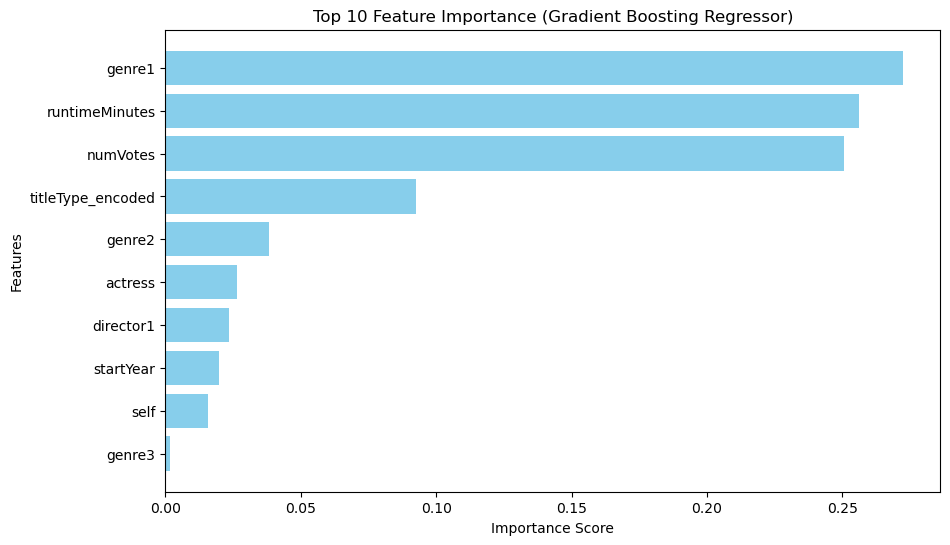

In [7]:
# Building the Gradient Boosting model
gb_feature_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_feature_model.fit(X_train, y_train)

# Extract feature importance and select top 10 features
gb_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_feature_model.feature_importances_
})
gb_top_10_features = gb_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (Gradient Boosting):")
print(gb_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(gb_top_10_features['Feature'], gb_top_10_features['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (Gradient Boosting Regressor)")
plt.gca().invert_yaxis()
plt.show()

In [8]:
# Building the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Making predictions on the train and test set
gb_y_train_pred = gb_model.predict(X_train)
gb_y_test_pred = gb_model.predict(X_test)

# Evaluating the model
gb_mse_train = mean_squared_error(y_train, gb_y_train_pred)
gb_mse_test = mean_squared_error(y_test, gb_y_test_pred)
gb_r2_train = r2_score(y_train, gb_y_train_pred)
gb_r2_test = r2_score(y_test, gb_y_test_pred)

print(f'Mean Squared Error -- Train: {gb_mse_train} | Test: {gb_mse_test}')
print(f'R-squared Score -- Train: {gb_r2_train} | Test: {gb_r2_test}')

Mean Squared Error -- Train: 1.6899126696987556 | Test: 1.7160659301327499
R-squared Score -- Train: 0.2661201788830251 | Test: 0.2577004038269062


#### Cross-Validation

In [9]:
# select top features
gb_best_features = gb_top_10_features['Feature'][0:4]
X_train_gb = X_train[gb_best_features]
X_test_gb = X_test[gb_best_features]

# Building the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


# Define RMSE as a scoring function
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)  # squared=False returns RMSE directly

## Cross Validation
# Evaluate using RMSE
gb_rmse_scores = cross_val_score(gb_model, X_train_gb, y_train, cv=5, scoring=rmse_scorer)
gb_average_rmse = -gb_rmse_scores.mean()
print(f"\nCross-Validation (5-Fold) - Gradient Boosting")
print(f"{'Metric':<30} {'Fold Scores':<50} {'Mean Score':<10}")
print(f"{'-'*95}")
print(f"RMSE Scores: {'':<12} {np.round(-gb_rmse_scores, 4)}  {'':<18} {gb_average_rmse:.4f}")

# Evaluate using r2
r2_scores = cross_val_score(gb_model, X_train_gb, y_train, cv=5, scoring='r2')
average_r2 = r2_scores.mean()
print(f"R² Scores: {'':<14} {np.round(r2_scores, 4)}  {'':<18} {average_r2:.4f}")
print('-' * 95)


Cross-Validation (5-Fold) - Gradient Boosting
Metric                         Fold Scores                                        Mean Score
-----------------------------------------------------------------------------------------------
RMSE Scores:              [1.3254 1.3269 1.3204 1.3101 1.3126]                     1.3191
R² Scores:                [0.2435 0.2422 0.2428 0.252  0.2413]                     0.2444
-----------------------------------------------------------------------------------------------


#### Final Test

In [10]:
## Training with GB top features
# Fit the model on the entire training data
gb_model.fit(X_train_gb, y_train)

# Making predictions on the train and test set
gb_y_train_pred = gb_model.predict(X_train_gb)
gb_y_test_pred = gb_model.predict(X_test_gb)

# Evaluating the model
gb_rmse_train = np.sqrt(mean_squared_error(y_train, gb_y_train_pred))
gb_rmse_test = np.sqrt(mean_squared_error(y_test, gb_y_test_pred))
gb_r2_train = r2_score(y_train, gb_y_train_pred)
gb_r2_test = r2_score(y_test, gb_y_test_pred)

print(f"\nFinal Model Performance - Gradient Boosting")
print(f"{'Metric':<30} {'Train Score':<20} {'Test Score':<20}")
print(f"{'-'*60}")
print(f"RMSE (Root Mean Squared Error): {'':<3} {gb_rmse_train:.4f} {'':<10} {gb_rmse_test:.4f}")
print(f"R² (R-squared): {'':<19} {gb_r2_train:.4f} {'':<10} {gb_r2_test:.4f}")


Final Model Performance - Gradient Boosting
Metric                         Train Score          Test Score          
------------------------------------------------------------
RMSE (Root Mean Squared Error):     1.3166            1.3252
R² (R-squared):                     0.2472            0.2404


### Light GBM Model
#### Feature Selection

Top 10 Features by Importance (LGBMRegressor):
             Feature  Importance
0             genre1         572
1     runtimeMinutes         493
2           numVotes         414
3             genre2         293
4          director1         253
5          startYear         244
6  titleType_encoded         216
7             genre3         150
8          director2          94
9               self          52


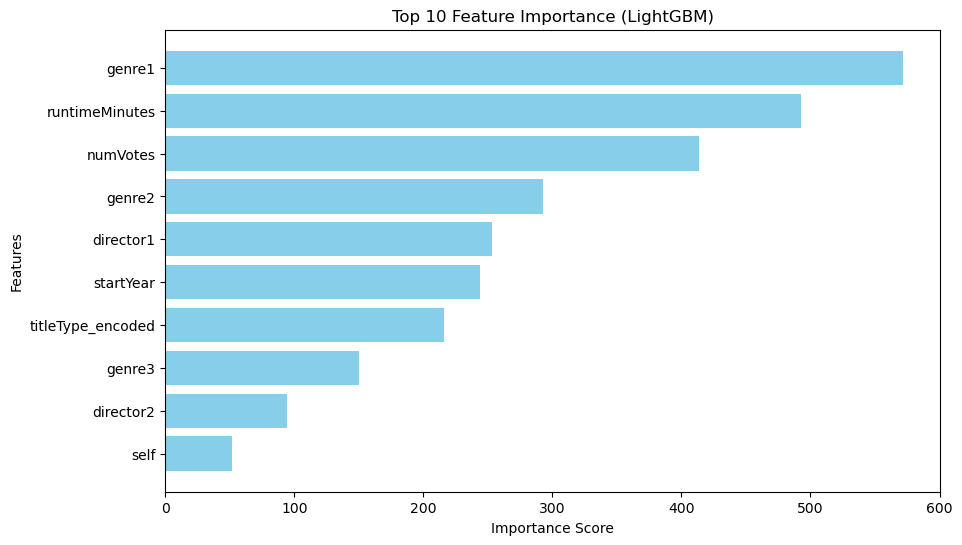

In [11]:
# Building the LGBMRegressor model
lgbm_feature_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
lgbm_feature_model.fit(X_train, y_train)

# Extract feature importance and select top 10 features
lgbm_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm_feature_model.feature_importances_
})
lgbm_top_10_features = lgbm_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (LGBMRegressor):")
print(lgbm_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(lgbm_top_10_features['Feature'], lgbm_top_10_features['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (LightGBM)")
plt.gca().invert_yaxis()
plt.show()

#### Cross-Validation

In [12]:
# select top features
lgbm_best_features = lgbm_top_10_features['Feature'][:]
X_train_lgbm = X_train[lgbm_best_features]
X_test_lgbm = X_test[lgbm_best_features]

# Building the LGBMRegressor model
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)


# Define RMSE as a scoring function
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)  # squared=False returns RMSE directly

## Cross Validation
# Evaluate using RMSE
lgbm_rmse_scores = cross_val_score(lgbm_model, X_train_lgbm, y_train, cv=5, scoring=rmse_scorer)
lgbm_average_rmse = -lgbm_rmse_scores.mean()
print(f"\nCross-Validation (5-Fold) - LightGBM Regressor")
print(f"{'Metric':<30} {'Fold Scores':<50} {'Mean Score':<10}")
print(f"{'-'*95}")
print(f"RMSE Scores: {'':<12} {np.round(-lgbm_rmse_scores, 4)}  {'':<18} {lgbm_average_rmse:.4f}")

# Evaluate using r2
r2_scores = cross_val_score(lgbm_model, X_train_lgbm, y_train, cv=5, scoring='r2')
average_r2 = r2_scores.mean()
print(f"R² Scores: {'':<14} {np.round(r2_scores, 4)}  {'':<18} {average_r2:.4f}")
print('-' * 95)


Cross-Validation (5-Fold) - LightGBM Regressor
Metric                         Fold Scores                                        Mean Score
-----------------------------------------------------------------------------------------------
RMSE Scores:              [1.2791 1.2828 1.2766 1.2657 1.2684]                     1.2745
R² Scores:                [0.2955 0.2918 0.2922 0.3019 0.2915]                     0.2946
-----------------------------------------------------------------------------------------------


#### Final Test

In [13]:
## Training with LGBM top features
# Fit the model on the entire training data
lgbm_model.fit(X_train_lgbm, y_train)

# Making predictions on the train and test set
lgbm_y_train_pred = lgbm_model.predict(X_train_lgbm)
lgbm_y_test_pred = lgbm_model.predict(X_test_lgbm)

# Evaluating the model
lgbm_rmse_train = np.sqrt(mean_squared_error(y_train, lgbm_y_train_pred))
lgbm_rmse_test = np.sqrt(mean_squared_error(y_test, lgbm_y_test_pred))
lgbm_r2_train = r2_score(y_train, lgbm_y_train_pred)
lgbm_r2_test = r2_score(y_test, lgbm_y_test_pred)

print(f"\nFinal Model Performance - LightGBM Regressor")
print(f"{'Metric':<30} {'Train Score':<20} {'Test Score':<20}")
print(f"{'-'*60}")
print(f"RMSE (Root Mean Squared Error): {'':<3} {lgbm_rmse_train:.4f} {'':<10} {lgbm_rmse_test:.4f}")
print(f"R² (R-squared): {'':<19} {lgbm_r2_train:.4f} {'':<10} {lgbm_r2_test:.4f}")


Final Model Performance - LightGBM Regressor
Metric                         Train Score          Test Score          
------------------------------------------------------------
RMSE (Root Mean Squared Error):     1.2626            1.2810
R² (R-squared):                     0.3077            0.2902


### XGBoost Model
#### Feature Selection

Top 10 Features by Importance (XGBoost):
             Feature  Importance
0             genre1  271.680481
1     runtimeMinutes  230.020172
2           numVotes  177.048859
3            actress  140.087158
4  titleType_encoded  134.178329
5               self  101.458420
6             genre2   69.394676
7          startYear   38.411686
8          director1   33.888279
9            isAdult   28.239347


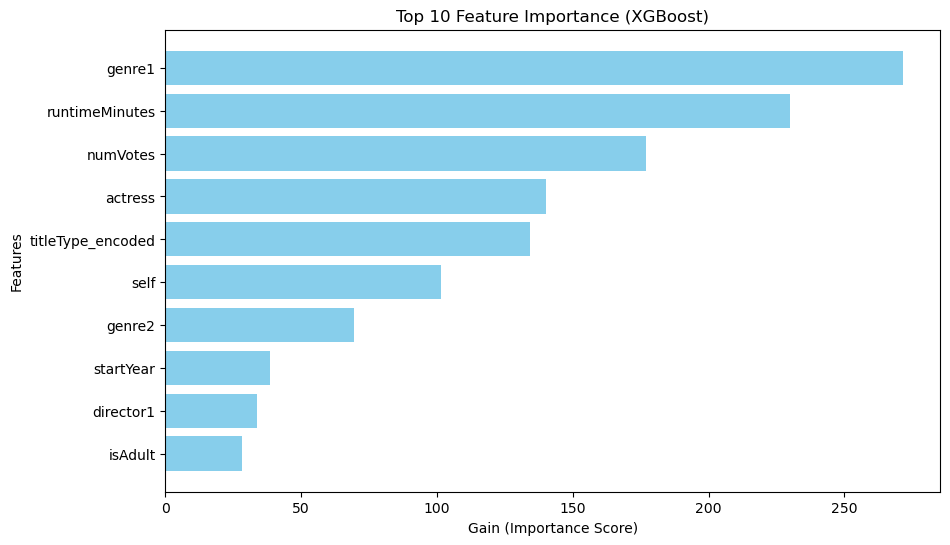

In [14]:
# Building the XGBRegressor model
xgb_feature_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_feature_model.fit(X_train, y_train)

# Extract feature importance using get_booster().get_score()
booster = xgb_feature_model.get_booster()
importance_dict = booster.get_score(importance_type='gain')

# Convert the importance dictionary to a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': [f for f in importance_dict.keys()],
    'Importance': [importance_dict[f] for f in importance_dict.keys()]
})

# Sort by importance and select top 10
xgb_top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (XGBoost):")
print(xgb_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(xgb_top_10_features['Feature'], xgb_top_10_features['Importance'], color='skyblue')
plt.xlabel("Gain (Importance Score)")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (XGBoost)")
plt.gca().invert_yaxis()
plt.show()

#### Cross-Validation

In [15]:
# select top features
xgb_best_features = xgb_top_10_features['Feature'][0:10]
X_train_xgb = X_train[xgb_best_features]
X_test_xgb = X_test[xgb_best_features]

# Building the XGBRegressor model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Define RMSE as a scoring function
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)  # squared=False returns RMSE directly

## Cross Validation
# Evaluate using RMSE
xgb_rmse_scores = cross_val_score(xgb_model, X_train_xgb, y_train, cv=5, scoring=rmse_scorer)
xgb_average_rmse = -xgb_rmse_scores.mean()
print(f"\nCross-Validation (5-Fold) - XGBoost Regressor")
print(f"{'Metric':<30} {'Fold Scores':<50} {'Mean Score':<10}")
print(f"{'-'*95}")
print(f"RMSE Scores: {'':<12} {np.round(-xgb_rmse_scores, 4)}  {'':<18} {xgb_average_rmse:.4f}")

# Evaluate using r2
r2_scores = cross_val_score(xgb_model, X_train_xgb, y_train, cv=5, scoring='r2')
average_r2 = r2_scores.mean()
print(f"R² Scores: {'':<14} {np.round(r2_scores, 4)}  {'':<18} {average_r2:.4f}")
print('-' * 95)


Cross-Validation (5-Fold) - XGBoost Regressor
Metric                         Fold Scores                                        Mean Score
-----------------------------------------------------------------------------------------------
RMSE Scores:              [1.2781 1.2827 1.2758 1.2652 1.2683]                     1.2740
R² Scores:                [0.2966 0.2919 0.2931 0.3024 0.2916]                     0.2951
-----------------------------------------------------------------------------------------------


#### Final Test

In [16]:
## Training with XGB top features
# Fit the model on the entire training data
xgb_model.fit(X_train_xgb, y_train)

# Making predictions on the train and test set
xgb_y_train_pred = xgb_model.predict(X_train_xgb)
xgb_y_test_pred = xgb_model.predict(X_test_xgb)

# Evaluating the model
xgb_rmse_train = np.sqrt(mean_squared_error(y_train, xgb_y_train_pred))
xgb_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_y_test_pred))
xgb_r2_train = r2_score(y_train, xgb_y_train_pred)
xgb_r2_test = r2_score(y_test, xgb_y_test_pred)

print(f"\nFinal Model Performance - XGBoost Regressor")
print(f"{'Metric':<30} {'Train Score':<20} {'Test Score':<20}")
print(f"{'-'*60}")
print(f"RMSE (Root Mean Squared Error): {'':<3} {xgb_rmse_train:.4f} {'':<10} {xgb_rmse_test:.4f}")
print(f"R² (R-squared): {'':<19} {xgb_r2_train:.4f} {'':<10} {xgb_r2_test:.4f}")


Final Model Performance - XGBoost Regressor
Metric                         Train Score          Test Score          
------------------------------------------------------------
RMSE (Root Mean Squared Error):     1.2560            1.2801
R² (R-squared):                     0.3149            0.2912


### CatBoostRegressor
#### Feature Selection

Top 10 Features by Importance (CatBoostRegressor):
             Feature  Importance
0             genre1   29.374023
1     runtimeMinutes   22.236463
2           numVotes   21.318636
3  titleType_encoded    9.804616
4             genre2    5.253631
5            actress    2.909666
6               self    2.610866
7          director1    2.417334
8          startYear    2.315330
9             genre3    0.542612


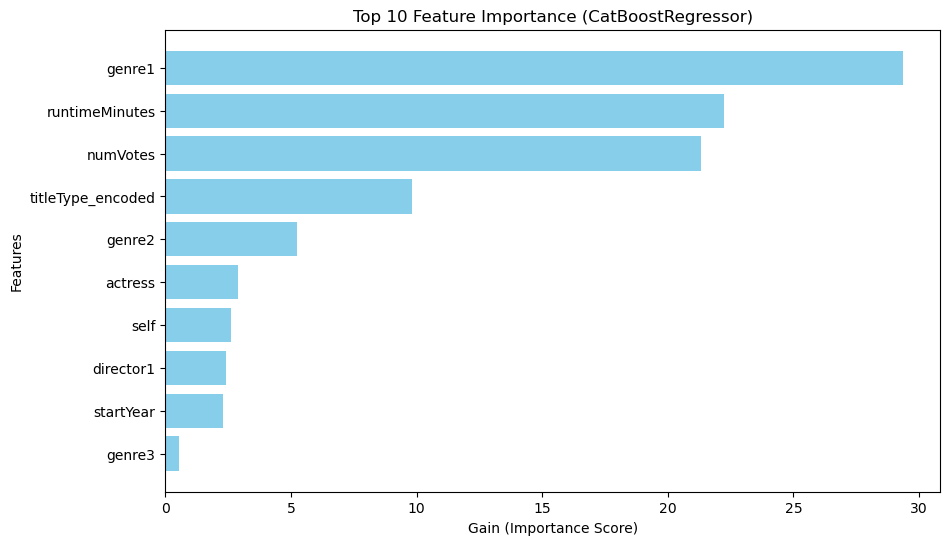

In [17]:
# Building the CatBoost Regressor model
cat_feature_model = CatBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=0)
cat_feature_model.fit(X_train, y_train)

# Extract feature importance and select top 10 features
cat_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': cat_feature_model.feature_importances_
})
cat_top_10_features = cat_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (CatBoostRegressor):")
print(cat_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(cat_top_10_features['Feature'], cat_top_10_features['Importance'], color='skyblue')
plt.xlabel("Gain (Importance Score)")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (CatBoostRegressor)")
plt.gca().invert_yaxis()
plt.show()

#### Cross-Validation

In [18]:
# select top features
cat_best_features = cat_top_10_features['Feature'][:]
X_train_cat = X_train[cat_best_features]
X_test_cat = X_test[cat_best_features]

# Building the CatBoostRegressor model
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0, random_state=42)
cat_model.fit(X_train_cat, y_train)

# Define RMSE as a scoring function
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)  # squared=False returns RMSE directly

## Cross Validation
# Evaluate using RMSE
cat_rmse_scores = cross_val_score(cat_model, X_train_cat, y_train, cv=5, scoring=rmse_scorer)
cat_average_rmse = -cat_rmse_scores.mean()
print(f"\nCross-Validation (5-Fold) - CatBoost Regressor")
print(f"{'Metric':<30} {'Fold Scores':<50} {'Mean Score':<10}")
print(f"{'-'*95}")
print(f"RMSE Scores: {'':<12} {np.round(-cat_rmse_scores, 4)}  {'':<18} {cat_average_rmse:.4f}")

# Evaluate using r2
r2_scores = cross_val_score(cat_model, X_train_cat, y_train, cv=5, scoring='r2')
average_r2 = r2_scores.mean()
print(f"R² Scores: {'':<14} {np.round(r2_scores, 4)}  {'':<18} {average_r2:.4f}")
print('-' * 95)


Cross-Validation (5-Fold) - CatBoost Regressor
Metric                         Fold Scores                                        Mean Score
-----------------------------------------------------------------------------------------------
RMSE Scores:              [1.2671 1.2718 1.263  1.2548 1.2562]                     1.2626
R² Scores:                [0.3086 0.3038 0.3072 0.3138 0.3051]                     0.3077
-----------------------------------------------------------------------------------------------


#### Final Test

In [19]:
## Training with CAT top features
# Fit the model on the entire training data
cat_model.fit(X_train_cat, y_train)

# Making predictions on the train and test set
cat_y_train_pred = cat_model.predict(X_train_cat)
cat_y_test_pred = cat_model.predict(X_test_cat)

# Evaluating the model
cat_rmse_train = np.sqrt(mean_squared_error(y_train, cat_y_train_pred))
cat_rmse_test = np.sqrt(mean_squared_error(y_test, cat_y_test_pred))
cat_r2_train = r2_score(y_train, cat_y_train_pred)
cat_r2_test = r2_score(y_test, cat_y_test_pred)

print(f"\nFinal Model Performance - CatBoost Regressor")
print(f"{'Metric':<30} {'Train Score':<20} {'Test Score':<20}")
print(f"{'-'*60}")
print(f"RMSE (Root Mean Squared Error): {'':<3} {cat_rmse_train:.4f} {'':<10} {cat_rmse_test:.4f}")
print(f"R² (R-squared): {'':<19} {cat_r2_train:.4f} {'':<10} {cat_r2_test:.4f}")


Final Model Performance - CatBoost Regressor
Metric                         Train Score          Test Score          
------------------------------------------------------------
RMSE (Root Mean Squared Error):     1.2309            1.2697
R² (R-squared):                     0.3420            0.3026


### Neural Network Model
#### Feature Selection

Top 10 Features by Importance (Neural Network):
              Feature  Importance
2      runtimeMinutes    0.145602
15             genre1    0.080312
20  titleType_encoded    0.065549
18          director1    0.028232
16             genre2    0.026180
13               self    0.025383
4             actress    0.020671
9            director    0.019552
3            numVotes    0.014986
1           startYear    0.009675


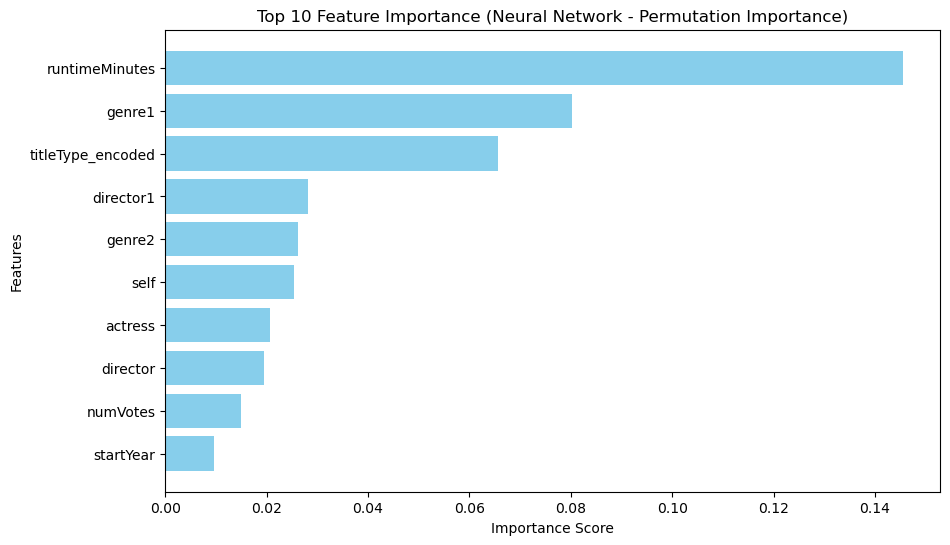

In [28]:
# Scaling Dataset
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)  # Convert back to DataFrame after scaling
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Define the Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(64, 32, 16), learning_rate_init=0.001, random_state=42, max_iter=10)

# Fit the model on the full training set
nn_model.fit(X_train_scaled, y_train)

# Calculate Permutation Importance
perm_importance = permutation_importance(nn_model, X_train_scaled, y_train, n_repeats=30, random_state=42)

# Create a DataFrame to store feature importance scores
nn_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Select the top 10 features based on Permutation Importance
nn_top_10_features = nn_feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Print the top 10 features
print("Top 10 Features by Importance (Neural Network):")
print(nn_top_10_features)

# Visualize the top 10 features using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(nn_top_10_features['Feature'], nn_top_10_features['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (Neural Network - Permutation Importance)")
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.show()

#### Final Test

In [32]:
# select top features
nn_best_features = nn_top_10_features['Feature'][:]
X_train_nn = X_train_scaled[nn_best_features]
X_test_nn = X_test_scaled[nn_best_features]

# Building the NN model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_nn.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='linear'))

# Compile Model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
nn_model.fit(X_train_nn, y_train, validation_split=0.1, epochs=10, batch_size=32, verbose=1)

# Making predictions on the train and test set
nn_y_train_pred = nn_model.predict(X_train_nn)
nn_y_test_pred = nn_model.predict(X_test_nn)

# Evaluating the model
nn_rmse_train = np.sqrt(mean_squared_error(y_train, nn_y_train_pred))
nn_rmse_test = np.sqrt(mean_squared_error(y_test, nn_y_test_pred))
nn_r2_train = r2_score(y_train, nn_y_train_pred)
nn_r2_test = r2_score(y_test, nn_y_test_pred)

print(f'Mean Squared Error -- Train: {nn_rmse_train} | Test: {nn_rmse_test}')
print(f'R-squared Score -- Train: {nn_r2_train} | Test: {nn_r2_test}')


Epoch 1/10
5688/5688 [==============================] - 7s 1ms/step - loss: 2.6734 - val_loss: 2.3032
Epoch 2/10
5688/5688 [==============================] - 7s 1ms/step - loss: 1.9360 - val_loss: 1.8856
Epoch 3/10
5688/5688 [==============================] - 7s 1ms/step - loss: 1.8725 - val_loss: 1.9092
Epoch 4/10
5688/5688 [==============================] - 7s 1ms/step - loss: 1.8493 - val_loss: 1.8968
Epoch 5/10
5688/5688 [==============================] - 7s 1ms/step - loss: 1.8324 - val_loss: 1.8289
Epoch 6/10
5688/5688 [==============================] - 7s 1ms/step - loss: 1.8204 - val_loss: 1.8317
Epoch 7/10
5688/5688 [==============================] - 7s 1ms/step - loss: 1.8141 - val_loss: 1.8318
Epoch 8/10
5688/5688 [==============================] - 7s 1ms/step - loss: 1.8068 - val_loss: 1.8100
Epoch 9/10
5688/5688 [==============================] - 7s 1ms/step - loss: 1.8022 - val_loss: 1.8897
Epoch 10/10
1580/1580 [==============================] - 1s 724us/step
Mean Square

### Predicted Dataset

In [30]:
# Putting the dataset together
predictions_df = X_test.copy()
predictions_df['averageRating'] = y_test
predictions_df['GB_preds'] = gb_y_test_pred
predictions_df['LGBM_preds'] = lgbm_y_test_pred
predictions_df['XGB_preds'] = xgb_y_test_pred
predictions_df['CAT_preds'] = cat_y_test_pred
predictions_df['NN_preds'] = nn_y_test_pred

# Display
predictions_df.head()

,isAdult,startYear,runtimeMinutes,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer,genre1,genre2,genre3,director1,director2,titleType_encoded,averageRating,GB_preds,LGBM_preds,XGB_preds,CAT_preds,NN_preds
99618,0.0,2011,83.0,102967.0,0,0,0,0,0,1,0,1,0,0,1,1,6,2,281508,0,1,6.1,5.727940,5.846384,6.026606,6.187697,6.410004
28895,0.0,2007,51.0,8.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,2152619,0,3,9.1,7.046470,7.000281,7.013858,6.927183,6.589914
187678,0.0,2014,9.0,5.0,0,0,0,1,1,1,0,0,0,0,0,6,11,0,7121989,0,2,9.6,7.354214,7.534873,7.639766,7.613340,6.978806
17756,0.0,2006,88.0,419.0,1,0,0,1,1,0,1,1,0,0,0,3,0,0,494069,0,1,6.5,5.446130,5.977076,5.907272,5.978857,6.215247
140193,0.0,2012,90.0,90.0,1,0,0,1,1,1,0,0,0,0,1,1,3,0,5188763,0,1,4.6,5.543962,5.639178,5.689574,5.755277,5.582937


#### Model Performance Table

In [43]:
# Create model performance table
model_perfor_df = pd.DataFrame({
    "Model": ["GradientBoosting", "LightGBM", "XGBoost", "CatBoost", "NeuralNetwork"],
    "R-Squared Train": [gb_r2_train, lgbm_r2_train, xgb_r2_train, cat_r2_train, nn_r2_train],
    "R-Squared Test": [gb_r2_test, lgbm_r2_test, xgb_r2_test, cat_r2_test, nn_r2_test],
    "RMSE Train": [gb_rmse_train, lgbm_rmse_train, xgb_rmse_train, cat_rmse_train, nn_rmse_train],
    "RMSE Test": [gb_rmse_test, lgbm_rmse_test, xgb_rmse_test, cat_rmse_test, nn_rmse_test]
    }).round(3)

# Sort by RMSE on test set
model_perfor_df = model_perfor_df.sort_values(by=['RMSE Test'], ascending=True).reset_index(drop=True)
model_perfor_df.head()

,Model,R-Squared Train,R-Squared Test,RMSE Train,RMSE Test
0,CatBoost,0.342,0.303,1.231,1.270
1,XGBoost,0.315,0.291,1.256,1.280
2,LightGBM,0.308,0.290,1.263,1.281
3,GradientBoosting,0.247,0.240,1.317,1.325
4,NeuralNetwork,0.229,0.218,1.333,1.345


#### Best Model Evaluation

All models demonstrated a relatively poor performance on both train and test sets, indicating limited predictive power. The CatBoost Regressor was the best model with an R-squared of 30.3% on the test set, slightly outperforming the others. This suggests it was able to generalize better, but it still explain only 30.3% of the variance in the tagert feature `averageRating`.

Given the low R-squared values, none of the models are suitable for production in their current form. To improve, the focus should be on:

* **Feature Engineering:** Create new interaction features or non-linear transformations.

* **Data Enhancement:** Include additional external data sources or more granular features.

* **Domain Knowledge:** Collaborate with stakeholders to better understand the problem and identify relevant features that may not be captured in the current dataset.

* **Classification Problem:** Transform the regression problem into a classification task by creating bins for averageRating. Predicting the bin each record falls into could increase model interpretability and potentially improve accuracy, making the predictions more actionable and easier to evaluate.

With these strategies, these models may have their performance significantly improved, making it more appropriate for production deployment.

### Problem 3.  
You will make classification models here. Use Rating as the target variable. Make sure to exclude averageRating(Why?) from the predictor variables.

* Select five advanced classification models beyond basic ones like Multinomial Logistic Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM. Determine appropriate test size and validation method, providing a clear rationale for your choices. Split your data into training and testing sets based on these decisions. Use 'Rating' as your target variable. Explain why 'averageRating' should be excluded. Preprocess your feature set as required by your selected models.

* Implement each of your five chosen classification models using the prepared data. Train each model on the training set and generate predictions for the test set. Create a table showing the accuracy scores for all five models on both the training and testing data. For your best-performing model, create and display a colored heatmap of the confusion matrix for the test data predictions.

* Select one additional metric beyond accuracy for validating your models, explaining why you chose this metric. Evaluate all five models using this additional metric and determine which model performs best based on it. Critically assess whether your best model is suitable for production use, discussing its strengths and limitations. Propose specific strategies or techniques you would employ to further improve the model's performance.

### Import Libraries

In [1]:
# Standards
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Data prep for modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.inspection import permutation_importance

# Modeling
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, f1_score


### Config

In [2]:
# Data location
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/MIS 546 - Advanced Business Analytics/Data/"
file_name = "newimdb_clean.csv"

### Import clean dataset

In [3]:
# Import dataset
clean_df = pd.read_csv(data_loc + file_name)
clean_df.head()

,isAdult,startYear,runtimeMinutes,averageRating,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer,genre1,genre2,genre3,director1,director2,titleType_encoded,rating
0,0.0,2015,95.903562,8.1,63.0,1,0,0,1,1,1,1,0,0,0,1,1,2,3,13648797,0,1,5
1,0.0,2001,104.000000,2.4,23686.0,1,0,0,1,1,1,0,1,0,0,1,3,4,5,193554,0,1,1
2,0.0,2001,100.000000,4.9,1850.0,1,0,0,0,1,1,0,1,0,0,1,6,7,8,440948,0,1,1
3,0.0,2005,77.000000,7.3,279860.0,1,0,0,0,0,1,0,0,0,0,1,9,3,10,318,425843,1,4
4,0.0,2005,10.000000,6.0,343.0,1,0,0,1,0,0,0,0,0,0,0,11,0,0,473647,0,2,2


### Data Prep
#### Select potential predictor features and target feature

In [4]:
# Predictor Features
X = clean_df.drop(columns=['averageRating', 'rating'])

# Tagert Feature
y = clean_df['rating']

Here, we need to drop the `averageRating` column because it'd leak 100% of the informaion needed for the model predict `rating`. In a real scenario, we would not have this feature in an inference batch to make predictions on. Therefore, we must remove it.

#### Split data into train and test sets

In [5]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I selected an 80/20 train-test split for the data, where 80% is used for training and 20% for testing. This provides a good balance, ensuring that the model has enough data to learn from while having also enough data for an unbiased evaluation of performance on unseen samples.

For model validation, I chose 5-Fold Cross-Validation on the training set. This method divides the training data into 5 subsets, where the model is trained on 4 subsets and validated on the remaining one. This process is repeated 5 times, in which each subset is treated as a validation set at least once. At the end, the average results across all folds helps on the assessment of the model’s generalization capability, which may reduce variance and mitigate the risk of overfitting.

### Modeling

* *Models to be considered:* 
    - AdaBoost Classifier
    - XGBoost Classifier
    - LightGBM Classifier
    - CatBoost Classifier
    - Neural Network Classifier

* *Evaluation methods:* For the following classification models, I am going to use Accuracy and F-1 Score as the evaluation methods. Accuracy indicates how often the model correctly predicts the labels, making it a straightforward metric for evaluating overall performance. F1-score combines precision (correct positive predictions) and recall (capturing all positives), ensuring the model performs well across all classes. Together, they provide a complete picture of prediction quality, covering both correctness and consistency in classification.

#### AdaBoost Classifier Model

##### Feature Selection

Top 10 Features by Importance (AdaBoostClassifier):
             Feature  Importance
0             genre1    0.035882
1           numVotes    0.035691
2     runtimeMinutes    0.035285
3  titleType_encoded    0.008900
4          director1    0.007375
5             genre2    0.004172
6          startYear    0.002592
7           producer    0.002353
8            actress    0.001954
9             editor    0.000884


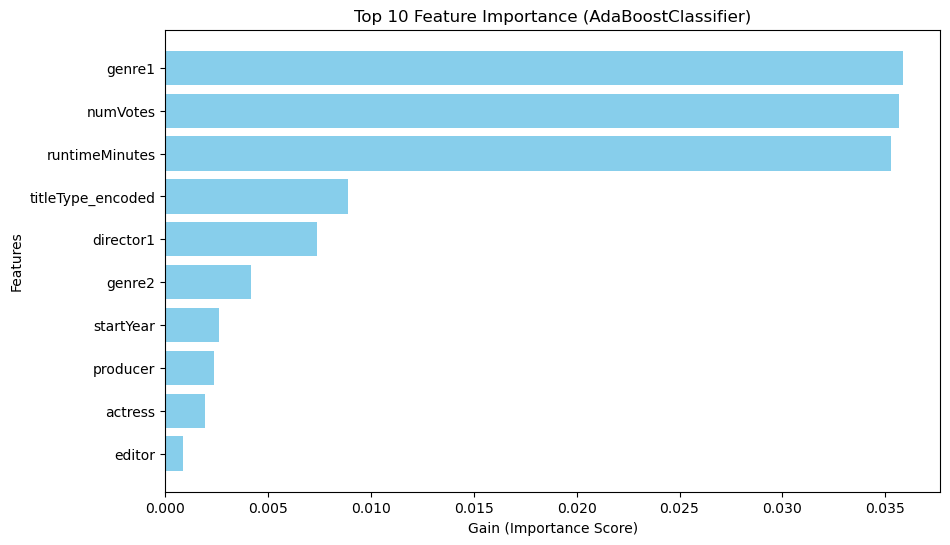

In [6]:
# Building the AdaBoostClassifier model
ada_feature_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_feature_model.fit(X_train, y_train)

perm_importance = permutation_importance(ada_feature_model, X_train, y_train, n_repeats=30, random_state=42)

# Create a DataFrame to store feature importances
ada_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance and select top 10
ada_top_10_features = ada_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (AdaBoostClassifier):")
print(ada_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(ada_top_10_features['Feature'], ada_top_10_features['Importance'], color='skyblue')
plt.xlabel("Gain (Importance Score)")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (AdaBoostClassifier)")
plt.gca().invert_yaxis()
plt.show()

##### Cross-Validation

In [7]:
# select top features
ada_best_features = ada_top_10_features['Feature'][:]
X_train_ada = X_train[ada_best_features]
X_test_ada = X_test[ada_best_features]

# Building the AdaBoostClassifier model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_ada, y_train)

# Define a custom scorer for F1 score (weighted to account for class imbalance)
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation using accuracy and F1-score
ada_cv_accuracy_scores = cross_val_score(ada_model, X_train_ada, y_train, cv=5, scoring='accuracy')
ada_cv_f1_scores = cross_val_score(ada_model, X_train_ada, y_train, cv=5, scoring=f1_scorer)

print(f"\nCross-Validation Scores (5-Fold) for AdaBoost")
print("=============================================")
print(f"Accuracy: {ada_cv_accuracy_scores.mean():.3f} ± {ada_cv_accuracy_scores.std():.3f}")
print(f"F1-Score: {ada_cv_f1_scores.mean():.3f} ± {ada_cv_f1_scores.std():.3f}")


Cross-Validation Scores (5-Fold) for AdaBoost
Accuracy: 0.353 ± 0.002
F1-Score: 0.322 ± 0.002


##### Final Test

In [8]:
# Making predictions on the train and test set
ada_y_train_pred = ada_model.predict(X_train_ada)
ada_y_test_pred = ada_model.predict(X_test_ada)

# Evaluate the model's performance
print("\nFinal Model Evaluation for AdaBoost Classifier")
print("=============================================")

# Training Set Evaluation
ada_train_accuracy = accuracy_score(y_train, ada_y_train_pred)
ada_train_f1_score = f1_score(y_train, ada_y_train_pred, average='weighted')
print("Training Set Performance")
print(f"Accuracy: {ada_train_accuracy:.3f}")
print(f"F1-Score: {ada_train_f1_score:.3f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_train, ada_y_train_pred)}")
# print(f"Classification Report:\n{classification_report(y_train, ada_y_train_pred)}")

# Testing Set Evaluation
ada_test_accuracy = accuracy_score(y_test, ada_y_test_pred)
ada_test_f1_score = f1_score(y_test, ada_y_test_pred, average='weighted')
print("\nTesting Set Performance")
print(f"Accuracy: {ada_test_accuracy:.3f}")
print(f"F1-Score: {ada_test_f1_score:.3f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_test, ada_y_test_pred)}")
# print(f"Classification Report:\n{classification_report(y_test, ada_y_test_pred)}")


Final Model Evaluation for AdaBoost Classifier
Training Set Performance
Accuracy: 0.354
F1-Score: 0.326

Testing Set Performance
Accuracy: 0.351
F1-Score: 0.323


#### XGBoost Classifier
##### Feature Selection

Top 10 Features by Importance (XGBoost Classifier):
             Feature  Importance
0           numVotes    0.079104
1     runtimeMinutes    0.071120
2             genre1    0.068923
3  titleType_encoded    0.035874
4          director1    0.033853
5          startYear    0.026643
6             genre2    0.025524
7             genre3    0.012835
8          director2    0.012210
9           producer    0.005652


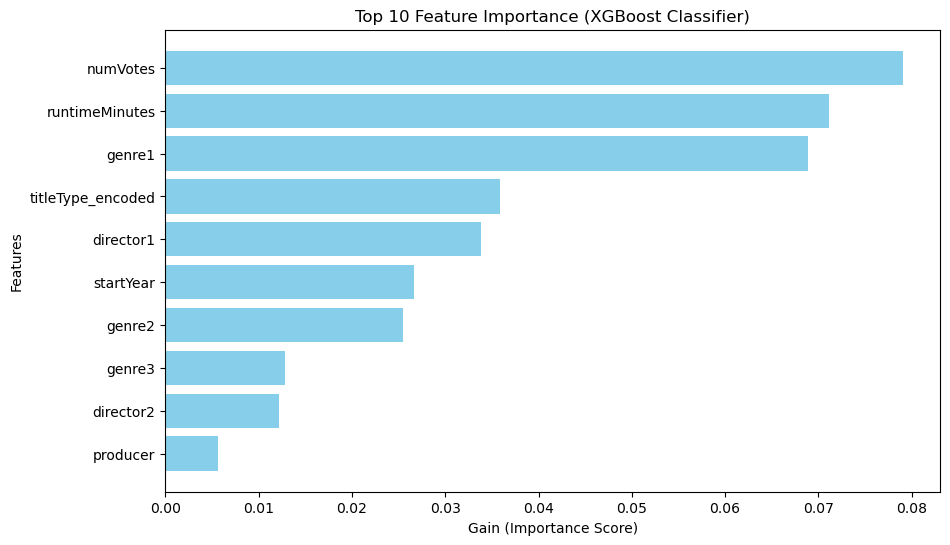

In [9]:
# Feature Importance using Permutation Importance
xgb_feature_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_feature_model.fit(X_train, y_train-1)

# Calculate permutation importance
perm_importance = permutation_importance(xgb_feature_model, X_train, y_train-1, n_repeats=30, random_state=42)

# Create a DataFrame to store feature importances
xgb_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance and select top 10
xgb_top_10_features = xgb_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (XGBoost Classifier):")
print(xgb_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(xgb_top_10_features['Feature'], xgb_top_10_features['Importance'], color='skyblue')
plt.xlabel("Gain (Importance Score)")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (XGBoost Classifier)")
plt.gca().invert_yaxis()
plt.show()

##### Cross-Validation

In [10]:
# Select top features
xgb_best_features = xgb_top_10_features['Feature'][:]
X_train_xgb = X_train[xgb_best_features]
X_test_xgb = X_test[xgb_best_features]

# Building the XGBoostClassifier model
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_xgb, y_train-1)

# Define a custom scorer for F1 score (weighted to account for class imbalance)
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation using accuracy and F1-score
xgb_cv_accuracy_scores = cross_val_score(xgb_model, X_train_xgb, y_train-1, cv=5, scoring='accuracy')
xgb_cv_f1_scores = cross_val_score(xgb_model, X_train_xgb, y_train-1, cv=5, scoring=f1_scorer)

print(f"\nCross-Validation Scores (5-Fold) for XGBoost")
print("=============================================")
print(f"Accuracy: {xgb_cv_accuracy_scores.mean():.3f} ± {xgb_cv_accuracy_scores.std():.3f}")
print(f"F1-Score: {xgb_cv_f1_scores.mean():.3f} ± {xgb_cv_f1_scores.std():.3f}")



Cross-Validation Scores (5-Fold) for XGBoost
Accuracy: 0.382 ± 0.002
F1-Score: 0.365 ± 0.002


##### Final Test

In [11]:
# Making predictions on the train and test set
xgb_y_train_pred = xgb_model.predict(X_train_xgb)+1 
xgb_y_test_pred = xgb_model.predict(X_test_xgb)+1

# Evaluate the model's performance
print("\nFinal Model Evaluation for XGBoost Classifier")
print("=============================================")

# Training Set Evaluation
xgb_train_accuracy = accuracy_score(y_train, xgb_y_train_pred)
xgb_train_f1_score = f1_score(y_train, xgb_y_train_pred, average='weighted')
print("Training Set Performance")
print(f"Accuracy: {xgb_train_accuracy:.3f}")
print(f"F1-Score: {xgb_train_f1_score:.3f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_train, xgb_y_train_pred)}")
# print(f"Classification Report:\n{classification_report(y_train, xgb_y_train_pred)}")

# Testing Set Evaluation
xgb_test_accuracy = accuracy_score(y_test, xgb_y_test_pred)
xgb_test_f1_score = f1_score(y_test, xgb_y_test_pred, average='weighted')
print("\nTesting Set Performance")
print(f"Accuracy: {xgb_train_accuracy:.3f}")
print(f"F1-Score: {xgb_train_f1_score:.3f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_test, xgb_y_test_pred)}")
# print(f"Classification Report:\n{classification_report(y_test, xgb_y_test_pred)}")



Final Model Evaluation for XGBoost Classifier
Training Set Performance
Accuracy: 0.442
F1-Score: 0.428

Testing Set Performance
Accuracy: 0.442
F1-Score: 0.428


#### CatBoost Classifier
##### Feature Selection

Top 10 Features by Importance (CatBoost Classifier):
             Feature  Importance
0           numVotes    0.064452
1     runtimeMinutes    0.056290
2             genre1    0.054841
3  titleType_encoded    0.033236
4          director1    0.017670
5             genre2    0.016108
6          startYear    0.015642
7               self    0.007302
8             genre3    0.006003
9          director2    0.004298


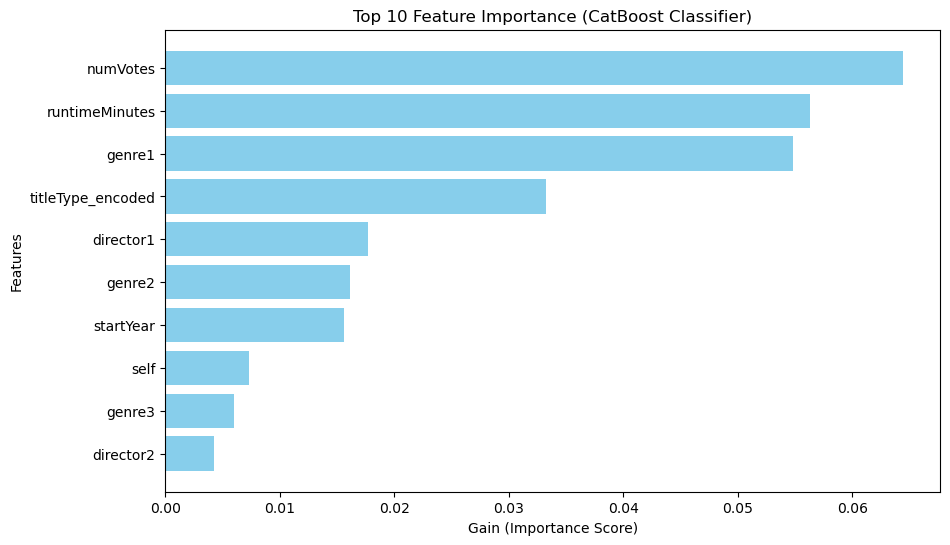

In [12]:
# Building the CatBoostClassifier model
cat_feature_model = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
cat_feature_model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(cat_feature_model, X_train, y_train, n_repeats=30, random_state=42)

# Create a DataFrame to store feature importances
cat_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance and select top 10
cat_top_10_features = cat_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (CatBoost Classifier):")
print(cat_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(cat_top_10_features['Feature'], cat_top_10_features['Importance'], color='skyblue')
plt.xlabel("Gain (Importance Score)")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (CatBoost Classifier)")
plt.gca().invert_yaxis()
plt.show()


##### Cross-Validation

In [13]:
# Select top features
cat_best_features = cat_top_10_features['Feature'][:]
X_train_cat = X_train[cat_best_features]
X_test_cat = X_test[cat_best_features]

# Building the CatBoostClassifier model
cat_model = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
cat_model.fit(X_train_cat, y_train)

# Define a custom scorer for F1 score (weighted to account for class imbalance)
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation using accuracy and F1-score
cat_cv_accuracy_scores = cross_val_score(cat_model, X_train_cat, y_train, cv=5, scoring='accuracy')
cat_cv_f1_scores = cross_val_score(cat_model, X_train_cat, y_train, cv=5, scoring=f1_scorer)

print(f"\nCross-Validation Scores (5-Fold) for CatBoost")
print("=============================================")
print(f"Accuracy: {cat_cv_accuracy_scores.mean():.3f} ± {cat_cv_accuracy_scores.std():.3f}")
print(f"F1-Score: {cat_cv_f1_scores.mean():.3f} ± {cat_cv_f1_scores.std():.3f}")



Cross-Validation Scores (5-Fold) for CatBoost
Accuracy: 0.378 ± 0.002
F1-Score: 0.361 ± 0.002


##### Final Test

In [14]:
# Making predictions on the train and test set
cat_y_train_pred = cat_model.predict(X_train_cat)
cat_y_test_pred = cat_model.predict(X_test_cat)

# Evaluate the model's performance
print("\nFinal Model Evaluation for CatBoost Classifier")
print("=============================================")

# Training Set Evaluation
cat_train_accuracy = accuracy_score(y_train, cat_y_train_pred)
cat_train_f1_score = f1_score(y_train, cat_y_train_pred, average='weighted')
print("Training Set Performance")
print(f"Accuracy: {cat_train_accuracy:.3f}")
print(f"F1-Score: {cat_train_f1_score:.3f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_train, cat_y_train_pred)}")
# print(f"Classification Report:\n{classification_report(y_train, cat_y_train_pred)}")

# Testing Set Evaluation
cat_test_accuracy = accuracy_score(y_test, cat_y_test_pred)
cat_test_f1_score = f1_score(y_test, cat_y_test_pred, average='weighted')
print("\nTesting Set Performance")
print(f"Accuracy: {cat_test_accuracy:.3f}")
print(f"F1-Score: {cat_test_f1_score:.3f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_test, cat_y_test_pred)}")
# print(f"Classification Report:\n{classification_report(y_test, cat_y_test_pred)}")



Final Model Evaluation for CatBoost Classifier
Training Set Performance
Accuracy: 0.400
F1-Score: 0.383

Testing Set Performance
Accuracy: 0.378
F1-Score: 0.359


#### LightGBM Classifier
##### Feature Selection

Top 10 Features by Importance (LightGBM Classifier):
             Feature  Importance
0           numVotes    0.062097
1     runtimeMinutes    0.059598
2             genre1    0.057071
3  titleType_encoded    0.027865
4          director1    0.015476
5             genre2    0.014882
6          startYear    0.012541
7             genre3    0.006184
8           producer    0.004229
9          director2    0.004000


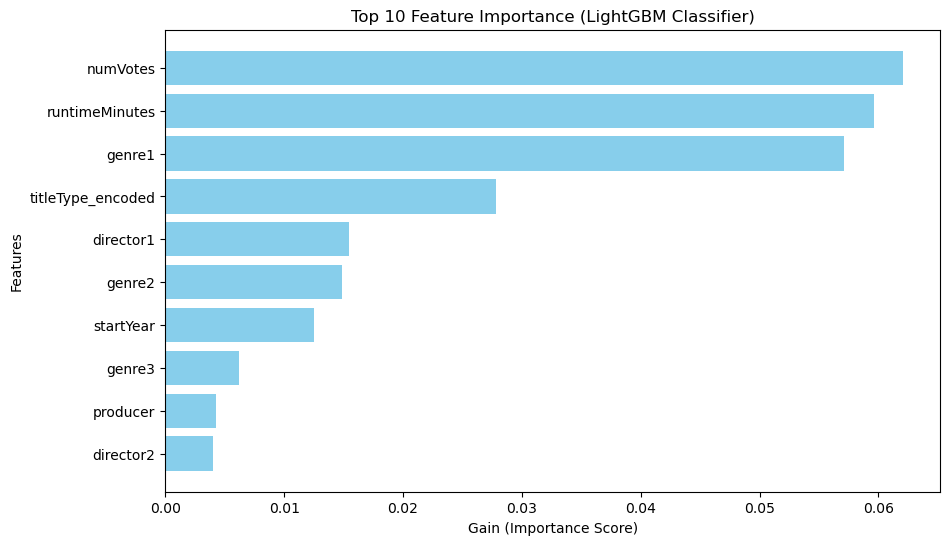

In [17]:
# Building the LightGBMClassifier model
lgbm_feature_model = LGBMClassifier(n_estimators=100, random_state=42, verbose=0)
lgbm_feature_model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(lgbm_feature_model, X_train, y_train, n_repeats=30, random_state=42)

# Create a DataFrame to store feature importances
lgbm_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance and select top 10
lgbm_top_10_features = lgbm_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (LightGBM Classifier):")
print(lgbm_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(lgbm_top_10_features['Feature'], lgbm_top_10_features['Importance'], color='skyblue')
plt.xlabel("Gain (Importance Score)")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (LightGBM Classifier)")
plt.gca().invert_yaxis()
plt.show()


##### Cross-Validation

In [18]:
# Select top features
lgbm_best_features = lgbm_top_10_features['Feature'][:]
X_train_lgbm = X_train[lgbm_best_features]
X_test_lgbm = X_test[lgbm_best_features]

# Building the LightGBMClassifier model
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model.fit(X_train_lgbm, y_train)

# Define a custom scorer for F1 score (weighted to account for class imbalance)
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation using accuracy and F1-score
lgbm_cv_accuracy_scores = cross_val_score(lgbm_model, X_train_lgbm, y_train, cv=5, scoring='accuracy')
lgbm_cv_f1_scores = cross_val_score(lgbm_model, X_train_lgbm, y_train, cv=5, scoring=f1_scorer)

print(f"\nCross-Validation Scores (5-Fold) for LightGBM")
print("=============================================")
print(f"Accuracy: {lgbm_cv_accuracy_scores.mean():.3f} ± {lgbm_cv_accuracy_scores.std():.3f}")
print(f"F1-Score: {lgbm_cv_f1_scores.mean():.3f} ± {lgbm_cv_f1_scores.std():.3f}")


Cross-Validation Scores (5-Fold) for LightGBM
Accuracy: 0.381 ± 0.002
F1-Score: 0.361 ± 0.002


##### Final test

In [19]:
# Making predictions on the train and test set
lgbm_y_train_pred = lgbm_model.predict(X_train_lgbm)
lgbm_y_test_pred = lgbm_model.predict(X_test_lgbm)

# Evaluate the model's performance
print("\nFinal Model Evaluation for LightGBM Classifier")
print("=============================================")

# Training Set Performance
lgbm_train_accuracy = accuracy_score(y_train, lgbm_y_train_pred)
lgbm_train_f1_score = f1_score(y_train, lgbm_y_train_pred, average='weighted')
print("Training Set Performance")
print(f"Accuracy: {lgbm_train_accuracy:.3f}")
print(f"F1-Score: {lgbm_train_f1_score:.3f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_train, lgbm_y_train_pred)}")
# print(f"Classification Report:\n{classification_report(y_train, lgbm_y_train_pred)}")

# Testing Set Performance
lgbm_test_accuracy = accuracy_score(y_test, lgbm_y_test_pred)
lgbm_test_f1_score = f1_score(y_test, lgbm_y_test_pred, average='weighted')
print("\nTesting Set Performance")
print(f"Accuracy: {lgbm_test_accuracy:.3f}")
print(f"F1-Score: {lgbm_test_f1_score:.3f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_test, lgbm_y_test_pred)}")
# print(f"Classification Report:\n{classification_report(y_test, lgbm_y_test_pred)}")


Final Model Evaluation for LightGBM Classifier
Training Set Performance
Accuracy: 0.408
F1-Score: 0.390

Testing Set Performance
Accuracy: 0.380
F1-Score: 0.359


#### Neural Network Classifier
##### Feature Selection

Top 10 Features by Importance (Neural Network Classifier):
               Feature  Importance
0              isAdult         0.0
1             producer         0.0
2            director2         0.0
3            director1         0.0
4               genre3         0.0
5               genre2         0.0
6               genre1         0.0
7               writer         0.0
8                 self         0.0
9  production_designer         0.0


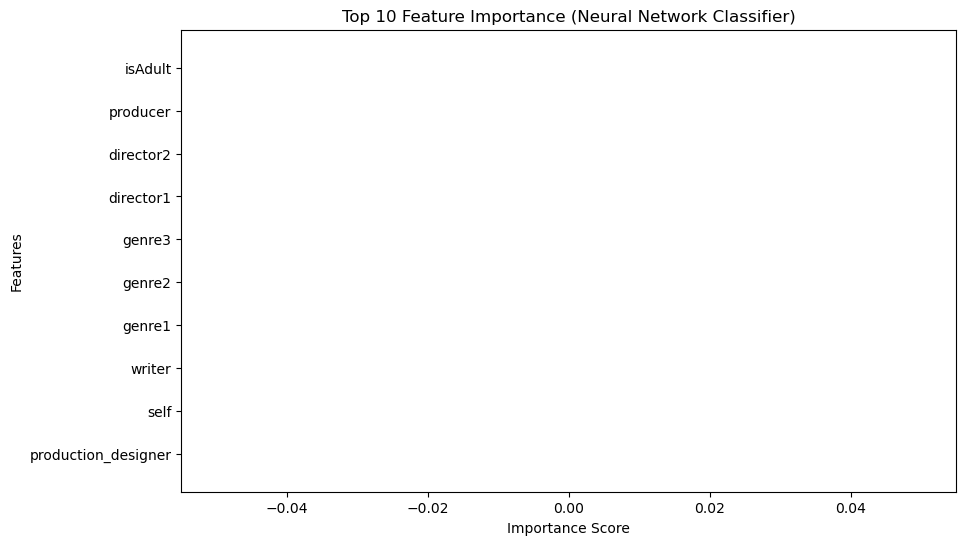

In [20]:
# Building the Neural Network model
nn_feature_model = MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=1000, random_state=42)
nn_feature_model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(nn_feature_model, X_train, y_train, n_repeats=30, random_state=42)

# Create a DataFrame to store feature importances
nn_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance and select top 10
nn_top_10_features = nn_feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)

# Print the top 10 feature names and their importance scores
print("Top 10 Features by Importance (Neural Network Classifier):")
print(nn_top_10_features)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(nn_top_10_features['Feature'], nn_top_10_features['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance (Neural Network Classifier)")
plt.gca().invert_yaxis()
plt.show()


##### Cross-Validation

In [21]:
# Select top features
nn_best_features = nn_top_10_features['Feature'][:]
X_train_nn = X_train[nn_best_features]
X_test_nn = X_test[nn_best_features]

# Building the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=1000, random_state=42)
nn_model.fit(X_train_nn, y_train)

# Define a custom scorer for F1 score (weighted to account for class imbalance)
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform 5-fold cross-validation using accuracy and F1-score
nn_cv_accuracy_scores = cross_val_score(nn_model, X_train_nn, y_train, cv=5, scoring='accuracy')
nn_cv_f1_scores = cross_val_score(nn_model, X_train_nn, y_train, cv=5, scoring=f1_scorer)

print(f"\nCross-Validation Scores (5-Fold) for Neural Network")
print("=============================================")
print(f"Accuracy: {nn_cv_accuracy_scores.mean():.3f} ± {nn_cv_accuracy_scores.std():.3f}")
print(f"F1-Score: {nn_cv_f1_scores.mean():.3f} ± {nn_cv_f1_scores.std():.3f}")


Cross-Validation Scores (5-Fold) for Neural Network
Accuracy: 0.216 ± 0.004
F1-Score: 0.093 ± 0.014


##### Final Test

In [22]:
# Making predictions on the train and test set
nn_y_train_pred = nn_model.predict(X_train_nn)
nn_y_test_pred = nn_model.predict(X_test_nn)

# Evaluate the model's performance
print("\nFinal Model Evaluation for Neural Network Classifier")
print("=============================================")

# Training Set Performance
nn_train_accuracy = accuracy_score(y_train, nn_y_train_pred)
nn_train_f1_score = f1_score(y_train, nn_y_train_pred, average='weighted')
print("Training Set Performance")
print(f"Accuracy: {nn_train_accuracy:.3f}")
print(f"F1-Score: {nn_train_f1_score:.3f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_train, nn_y_train_pred)}")
# print(f"Classification Report:\n{classification_report(y_train, nn_y_train_pred)}")

# Testing Set Performance
nn_test_accuracy = accuracy_score(y_test, nn_y_test_pred)
nn_test_f1_score = f1_score(y_test, nn_y_test_pred, average='weighted')
print("\nTesting Set Performance")
print(f"Accuracy: {nn_test_accuracy:.3f}")
print(f"F1-Score: {nn_test_f1_score:.3f}")
# print(f"Confusion Matrix:\n{confusion_matrix(y_test, nn_y_test_pred)}")
# print(f"Classification Report:\n{classification_report(y_test, nn_y_test_pred)}")



Final Model Evaluation for Neural Network Classifier
Training Set Performance
Accuracy: 0.215
F1-Score: 0.086

Testing Set Performance
Accuracy: 0.215
F1-Score: 0.085


### Predicted Dataset

In [23]:
# Putting the dataset together
class_predictions_df = X_test.copy()
class_predictions_df['rating'] = y_test
class_predictions_df['ADA_preds'] = ada_y_test_pred
class_predictions_df['XGB_preds'] = xgb_y_test_pred
class_predictions_df['CAT_preds'] = cat_y_test_pred
class_predictions_df['LGBM_preds'] = lgbm_y_test_pred
class_predictions_df['NN_preds'] = nn_y_test_pred

# Display
class_predictions_df.head()

,isAdult,startYear,runtimeMinutes,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer,genre1,genre2,genre3,director1,director2,titleType_encoded,rating,ADA_preds,XGB_preds,CAT_preds,LGBM_preds,NN_preds
99618,0.0,2011,83.0,102967.0,0,0,0,0,0,1,0,1,0,0,1,1,6,2,281508,0,1,2,2,2,2,2,1
28895,0.0,2007,51.0,8.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,2152619,0,3,5,5,5,5,5,1
187678,0.0,2014,9.0,5.0,0,0,0,1,1,1,0,0,0,0,0,6,11,0,7121989,0,2,5,5,5,5,5,1
17756,0.0,2006,88.0,419.0,1,0,0,1,1,0,1,1,0,0,0,3,0,0,494069,0,1,3,1,2,2,2,1
140193,0.0,2012,90.0,90.0,1,0,0,1,1,1,0,0,0,0,1,1,3,0,5188763,0,1,1,1,1,1,1,1


#### Model Performance Table

In [27]:
# Create model performance table
class_model_perfor_df = pd.DataFrame({
    "Model": ["AdaBoost", "XGBoost", "CatBoost", "LightGBM", "NeuralNetwork"],
    "Accuracy Train": [ada_train_accuracy, xgb_train_accuracy, cat_train_accuracy, lgbm_train_accuracy, nn_train_accuracy],
    "Accuracy Test": [ada_test_accuracy, xgb_test_accuracy, cat_test_accuracy, lgbm_test_accuracy, nn_test_accuracy],
    "F1-Score Train": [ada_train_f1_score, xgb_train_f1_score, cat_train_f1_score, lgbm_train_f1_score, nn_train_f1_score],
    "F1-Score Test": [ada_test_f1_score, xgb_test_f1_score, cat_test_f1_score, lgbm_test_f1_score, nn_test_f1_score]
    }).round(3)

# Sort by Accuracy on test set
class_model_perfor_df = class_model_perfor_df.sort_values(by=['Accuracy Test'], ascending=False).reset_index(drop=True)
class_model_perfor_df.head()

,Model,Accuracy Train,Accuracy Test,F1-Score Train,F1-Score Test
0,XGBoost,0.442,0.381,0.428,0.364
1,LightGBM,0.408,0.380,0.390,0.359
2,CatBoost,0.400,0.378,0.383,0.359
3,AdaBoost,0.354,0.351,0.326,0.323
4,NeuralNetwork,0.215,0.215,0.086,0.085


#### Best Model Evaluation

All models demonstrated a relatively poor performance on both train and test sets, indicating limited predictive power. The XGBoost was the best model with an accuracy of 38.1% on the test set, slightly outperforming the others. This suggests it was able to generalize better, but it still correctly classified the labels in the target feature `rating` only 38.1% of the time.

Given the low accuracy values, none of the models are suitable for production in their current form. To improve, the focus should be on:

* **Feature Engineering:** Create new interaction features or non-linear transformations.

* **Data Enhancement:** Include additional external data sources or more granular features.

* **Domain Knowledge:** Collaborate with stakeholders to better understand the problem and identify relevant features that may not be captured in the current dataset.

These strategies are what we have left to attempt in order to improve model performance and have a more appropriate model for production deployment.

#### Best Model Confusion Matrix HeatMap

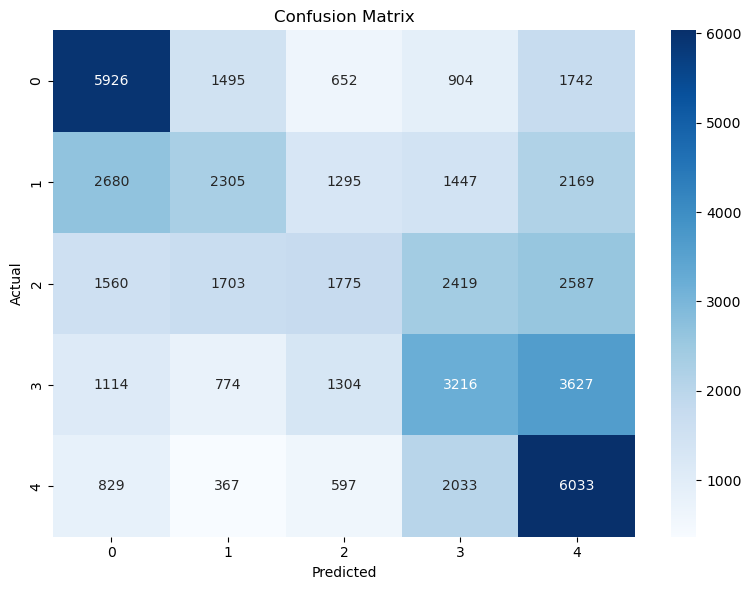

In [35]:
# XGBoost Confusion Matrix for the test dataset
conf_matrix = confusion_matrix(y_test, xgb_y_test_pred)

# Step 8: Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

### Problem 4. 
For this problem, you'll create clustering models using techniques other than K-Means clustering.
Here's the clustering problem structured into three parts:

* Select relevant columns from the cleaned data for clustering, providing a brief explanation for your choices. Determine the appropriate number of clusters (K) you want to use and justify your reasoning. This step should involve careful consideration of the dataset's characteristics and the potential insights you aim to gain from the clustering process.

* Implement two clustering models using techniques other than K-Means clustering with the chosen features. Predict cluster assignments for data points using each model. Add these cluster labels to the original dataset from problem 1, creating new columns to represent the cluster assignments from each model.

* For each of the two clustering models, identify two new pieces of information or insights about the dataset using the added cluster labels. Analyze how the clusters relate to other variables in the dataset and what patterns or groupings they reveal. Explain your process for deriving these insights and discuss their potential implications for understanding the IMDb dataset. Consider how these insights might be valuable for further analysis or decision-making in the context of movie ratings and characteristics.

### Import Libraries

In [1]:
# Standards
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

### Config

In [26]:
# Data location
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/MIS 546 - Advanced Business Analytics/Data/"
file_name = "newimdb_clean.csv"

### Import clean dataset

In [27]:
# Import dataset
clean_df = pd.read_csv(data_loc + file_name)
print(clean_df.shape)
clean_df.head()

(252763, 23)


,isAdult,startYear,runtimeMinutes,averageRating,numVotes,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer,genre1,genre2,genre3,director1,director2,titleType_encoded,rating
0,0.0,2015,95.903562,8.1,63.0,1,0,0,1,1,1,1,0,0,0,1,1,2,3,13648797,0,1,5
1,0.0,2001,104.000000,2.4,23686.0,1,0,0,1,1,1,0,1,0,0,1,3,4,5,193554,0,1,1
2,0.0,2001,100.000000,4.9,1850.0,1,0,0,0,1,1,0,1,0,0,1,6,7,8,440948,0,1,1
3,0.0,2005,77.000000,7.3,279860.0,1,0,0,0,0,1,0,0,0,0,1,9,3,10,318,425843,1,4
4,0.0,2005,10.000000,6.0,343.0,1,0,0,1,0,0,0,0,0,0,0,11,0,0,473647,0,2,2


#### Selecting Relevant Features and Determining the Number of Clusters

* *Feature Selection:* I'm going to use what I've observed from the feature importance bar-plots from the models above to select the top 5 features to work on the clustering problem.

* *Models to be considered*
    - Agglomerative Hierarchical Clustering
    - DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

* *Number of Clusters:* I'm going to use Elbow Method to help me to identify an optimal number of clusters.

#### Feature Selection

In [28]:
# Defining observed relevant columns
relevant_features = ['genre1', 'director1', 'runtimeMinutes', 'titleType_encoded', 'genre2', 'averageRating']

# Selecting observed relevant columns
cluster_df = clean_df[relevant_features]

# Scale the dataset before clustering
scaler = StandardScaler()
cluster_scaled_df = scaler.fit_transform(cluster_df)

# Convert the scaled array back to a DataFrame with original column names
cluster_scaled_df = pd.DataFrame(cluster_scaled_df, columns=cluster_df.columns)
print(cluster_scaled_df.shape)
cluster_scaled_df.head()

(252763, 6)


,genre1,director1,runtimeMinutes,titleType_encoded,genre2,averageRating
0,-1.108926,3.385248,0.140271,-0.790831,-0.570000,0.953550
1,-0.786646,-0.990728,0.188049,-0.790831,-0.242822,-2.801185
2,-0.303226,-0.910269,0.164444,-0.790831,0.247946,-1.154371
3,0.180195,-1.053573,0.028719,-0.790831,-0.406411,0.426570
4,0.502475,-0.899634,-0.366655,-0.295527,-0.897178,-0.429773


#### Obs.: I run into computing resources issues when running the clustering algorithms. So I randomly selected n observations to this problem.

In [29]:
# Randomly sample a subset of the data
cluster_sampled = cluster_scaled_df.sample(n=25000, random_state=42)
cluster_sampled.shape

(25000, 6)

### Agglomerative Clustering
#### Model

2
3
4
5
6
7
8
9


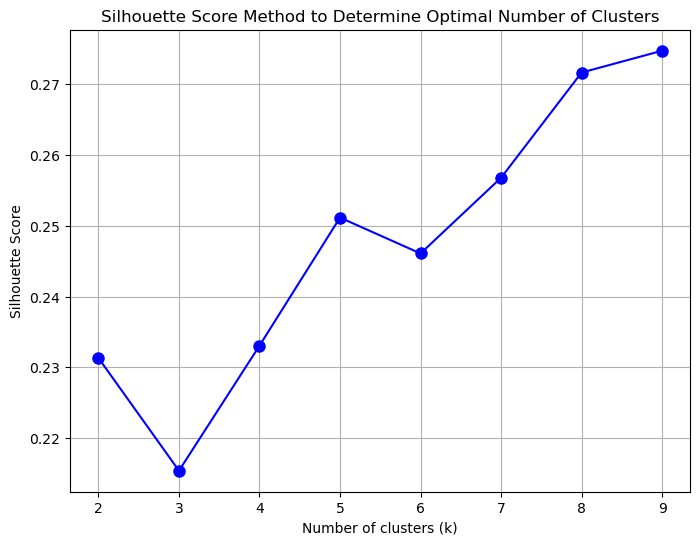

In [8]:
silhouette_scores = []
k_values = range(2, 10)  # Trying different cluster numbers from 2 to 10

for k in k_values:
    print(k)
    # Fit Agglomerative Clustering model for each k value
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    cluster_labels = agg_clustering.fit_predict(cluster_sampled)
    
    # Calculate silhouette score
    score = silhouette_score(cluster_sampled, cluster_labels)
    silhouette_scores.append(score)

# Plot the Silhouette Score Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method to Determine Optimal Number of Clusters')
plt.grid(True)
plt.show()

The highest silhouette score is at k = 9, suggesting that 9 clusters might be the most optimal choice for the dataset. The increasing trend in the silhouette score means that adding more clusters helps on the separation of the clusters. However, the overall silhouette scores are relatively low (all below 0.3), indicating that even with 9 clusters, the clustering structure is not very strong. This could mean that the data points are not distinctly grouped, or that additional feature engineering might be necessary to achieve better clustering performance.

#### Model

In [30]:
# Build AgglomerativeClustering model
agg_model = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
cluster_sampled['cluster_agglomerative'] = agg_model.fit_predict(cluster_sampled)

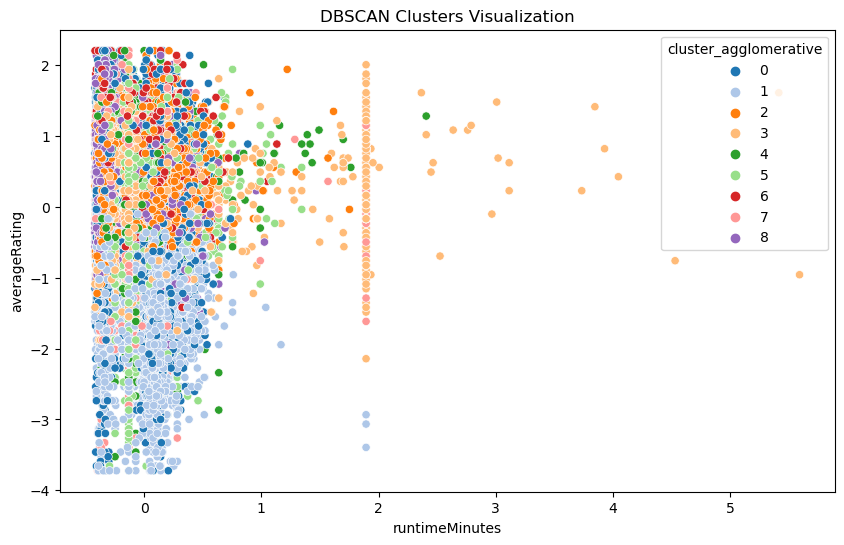

In [39]:
# Scatter plot of two relevant features with cluster labels color-coded
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtimeMinutes', y='averageRating', hue='cluster_agglomerative', data=cluster_sampled, palette='tab20')
plt.title('DBSCAN Clusters Visualization')
plt.show()


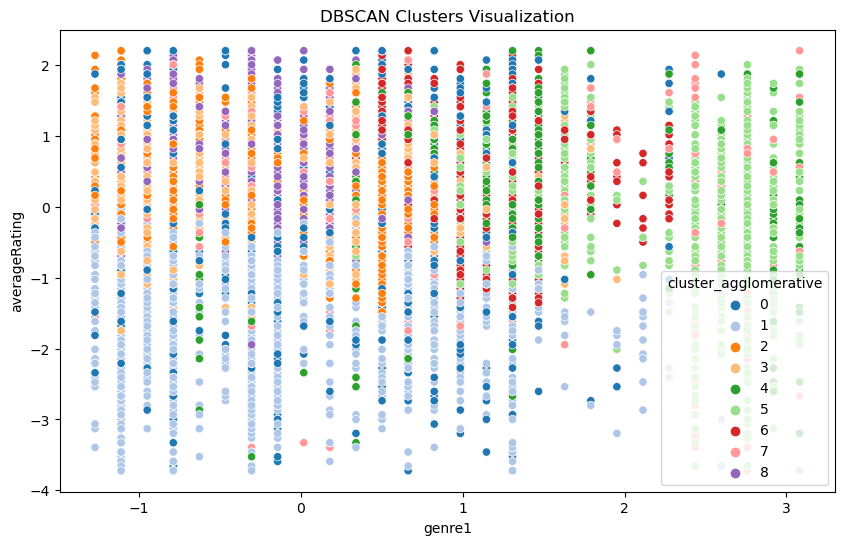

In [43]:
# Scatter plot of two relevant features with cluster labels color-coded
plt.figure(figsize=(10, 6))
sns.scatterplot(x='genre1', y='averageRating', hue='cluster_agglomerative', data=cluster_sampled, palette='tab20')
plt.title('DBSCAN Clusters Visualization')
plt.show()


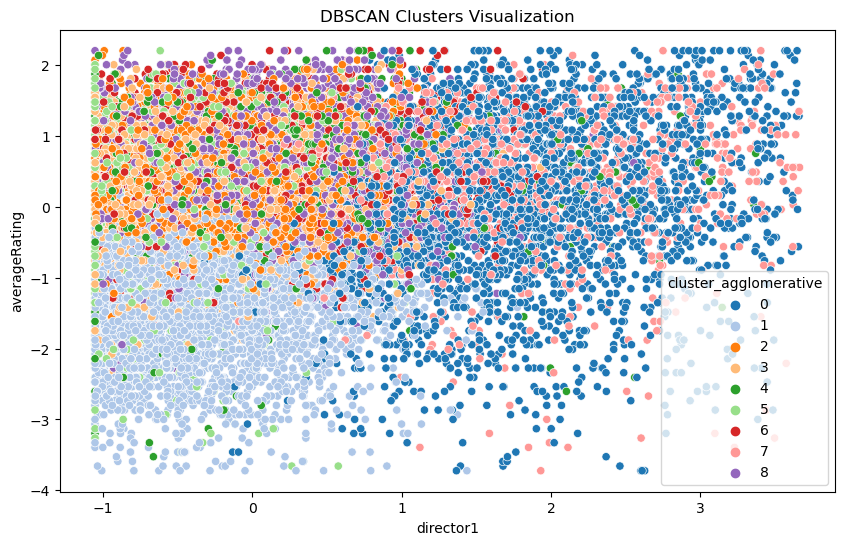

In [44]:
# Scatter plot of two relevant features with cluster labels color-coded
plt.figure(figsize=(10, 6))
sns.scatterplot(x='director1', y='averageRating', hue='cluster_agglomerative', data=cluster_sampled, palette='tab20')
plt.title('DBSCAN Clusters Visualization')
plt.show()


#### DBSCAN Clustering
#### Optimal Number of Clusters

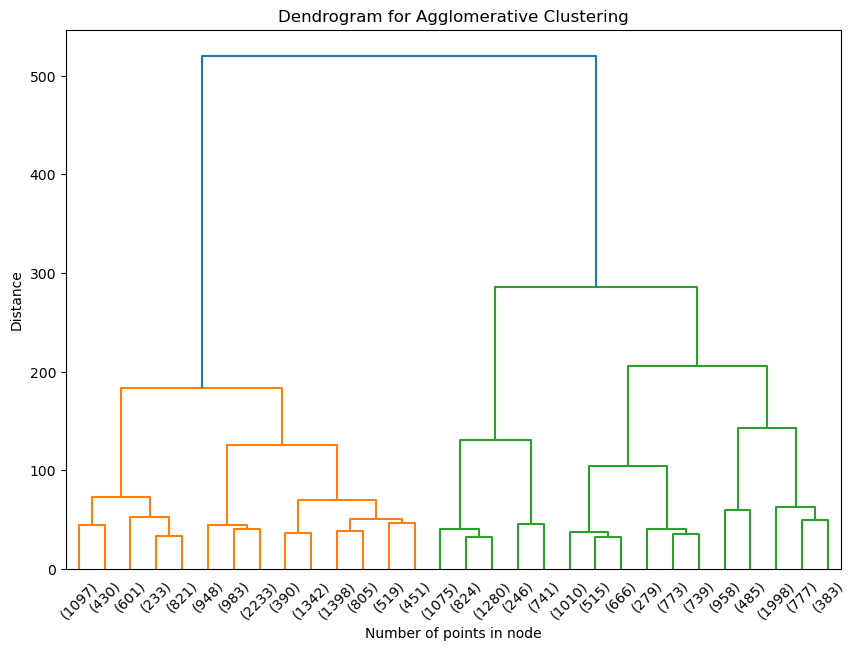

In [31]:
# Calculate the linkage matrix
linked = linkage(cluster_sampled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30) 
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Number of points in node')
plt.ylabel('Distance')
plt.show()

The dendrogram shows the hierarchical structure of clusters formed through Agglomerative Clustering. The y axis represents the distance or dissimilarity between clusters. The large vertical jump at around a distance of 500 suggests that merging clusters beyond this point leads to a significant loss of information. Therefore, it indicates that splitting the data into two main clusters (green and orange) might be the most appropriate choice based on this dendrogram, as more divisions occur at much smaller distances.

#### Model

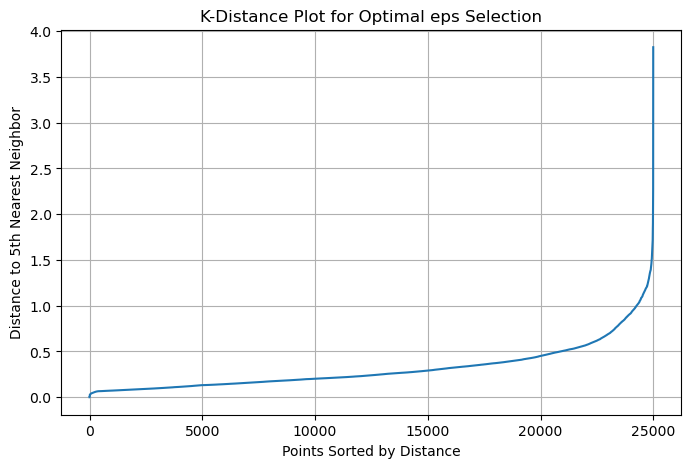

In [33]:
# Compute the k-distance plot for DBSCAN
nearest_neighbors = NearestNeighbors(n_neighbors=5)  # Use min_samples value
nearest_neighbors.fit(cluster_sampled)
distances, indices = nearest_neighbors.kneighbors(cluster_sampled)

# Sort the distances and plot
sorted_distances = np.sort(distances[:, -1])  # Get the distances to the k-th nearest neighbor
plt.figure(figsize=(8, 5))
plt.plot(sorted_distances)
plt.xlabel('Points Sorted by Distance')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.title('K-Distance Plot for Optimal eps Selection')
plt.grid(True)
plt.show()

In [38]:
# Use k-distance plot to determine optimal eps and min_samples
dbscan_model = DBSCAN(eps=1, min_samples=10)
cluster_sampled['cluster_dbscan'] = dbscan_model.fit_predict(cluster_sampled)

# Check the number of clusters found and the unique labels
unique_labels = cluster_sampled['cluster_dbscan'].unique()
print(f"Number of clusters found: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Unique labels: {unique_labels}")

Number of clusters found: 73
Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 -1 24 25 30 26 27 33 28 29 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 68 71 61 67 62 63 64 65 66 69
 70 72]


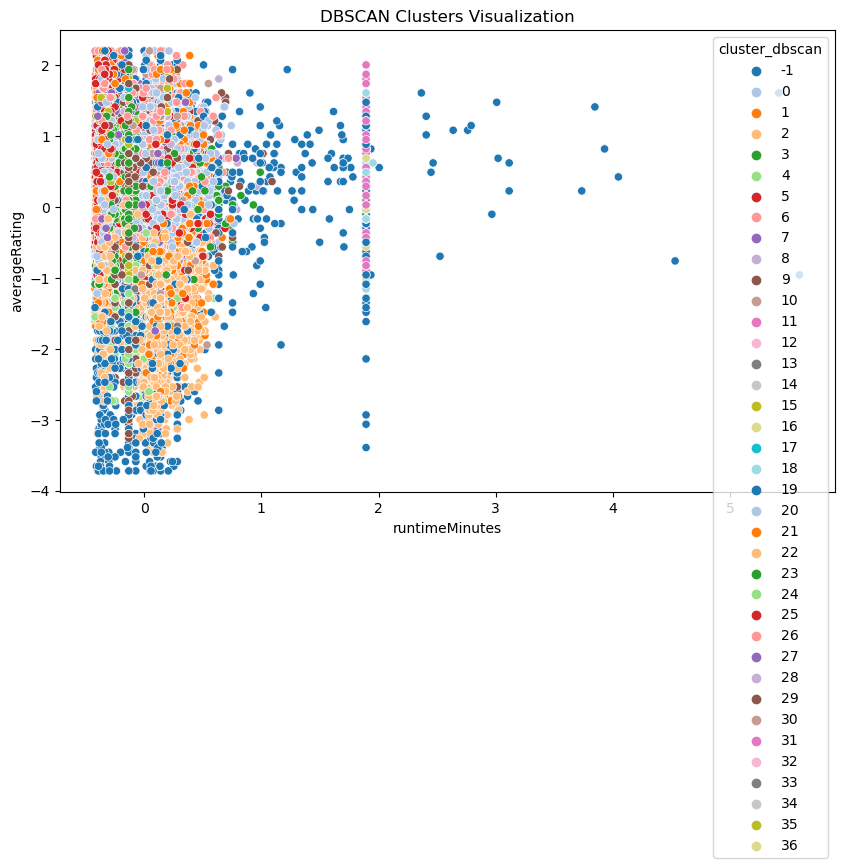

In [34]:
# Scatter plot of two relevant features with cluster labels color-coded
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtimeMinutes', y='averageRating', hue='cluster_dbscan', data=cluster_sampled, palette='tab20')
plt.title('DBSCAN Clusters Visualization')
plt.show()


### Visualize and Analyze Clusters

In [13]:
cluster_sampled.head()

,genre1,director1,runtimeMinutes,titleType_encoded,genre2,cluster_agglomerative,cluster_dbscan
99618,-1.108926,-0.962123,0.064125,-0.790831,0.084356,1,0
28895,-1.270066,-0.353591,-0.124710,0.199777,-0.897178,2,1
187678,-0.303226,1.262570,-0.372556,-0.295527,0.902302,6,2
17756,-0.786646,-0.892993,0.093631,-0.790831,-0.897178,1,0
140193,-1.108926,0.633837,0.105433,-0.790831,-0.406411,1,0


In [45]:
# Calculate mean values for each cluster in Agglomerative Clustering
agg_cluster_summary = cluster_sampled.groupby('cluster_agglomerative').mean()

# Calculate mean values for each cluster in DBSCAN Clustering
dbscan_cluster_summary = cluster_sampled.groupby('cluster_dbscan').mean()

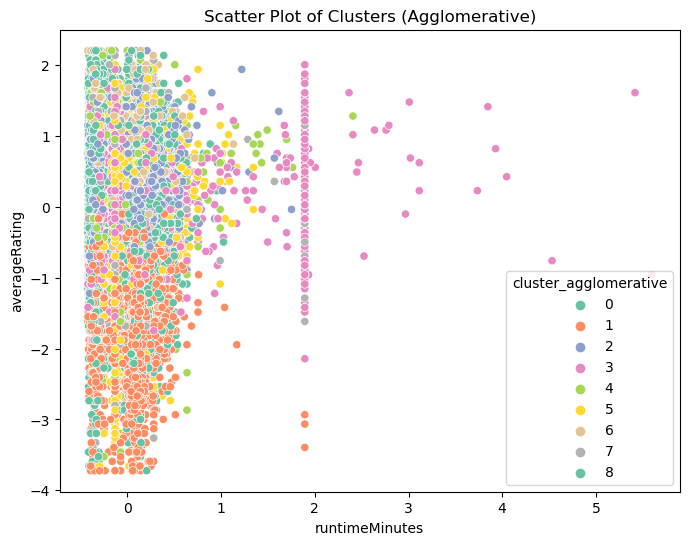

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of two key features with clusters color-coded
plt.figure(figsize=(8, 6))
sns.scatterplot(x='runtimeMinutes', y='averageRating', hue='cluster_agglomerative', data=cluster_sampled, palette='Set2')
plt.title('Scatter Plot of Clusters (Agglomerative)')
plt.show()


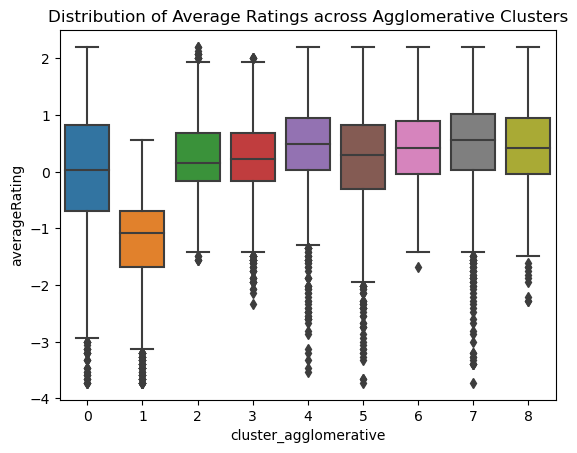

In [47]:
# Analyze distribution of average ratings across clusters
sns.boxplot(x='cluster_agglomerative', y='averageRating', data=cluster_sampled)
plt.title('Distribution of Average Ratings across Agglomerative Clusters')
plt.show()

**Cluster 1:** Lowest median rating and compact distribution, indicating a group of consistently low-rated movies.

**Clusters 4, 5, 7, and 8:** Higher median ratings, representing better-received movies.

**Cluster 0:** High variability, suggesting a mix of both well-rated and poorly-rated movies.

**Clusters 2 and 3:** Compact distribution around the median, indicating more consistent ratings.


## Overall

I couldn't derive many meaningful insights from the cluster analysis due to the complexity and messiness of the data. With more time for deeper exploration and refinement, it's possible that more valuable insights could be uncovered.

### Problem 5. 
Upload the AirPassenger data. The dataset has two columns: Month representing the time in a specific format (e.g., "1949-01" for January 1949) and #Passengers representing the number of passengers for each corresponding month.

*  Extract month and year from the 'Month' column. Perform summary statistics on the '#Passengers' column. Visualize the overall distribution of passenger counts using appropriate plots. Create time series plots to visually inspect trends, seasonality, and patterns. Decompose the time series into trend, seasonality, and residual components, and visualize each component separately.

* Apply ARIMA, Exponential Smoothing, and Prophet models to the data. Evaluate the accuracy of all three forecasting methods using appropriate metrics such as RMSE, MAE, and MAPE. Create autocorrelation and partial autocorrelation plots to identify lag relationships in the time series data. Implement and visualize a technique like moving averages or differencing to remove trends and highlight patterns in the data.

* Implement an anomaly detection method, such as a rolling average with anomaly thresholds. Visualize and analyze the identified anomalies in the context of the time series. Discuss the implications of these anomalies and how they relate to the overall patterns observed in the data. Compare the results of the anomaly detection with the findings from the forecasting models, and explain any discrepancies or correlations between the two analyses.


### Libraries

In [1]:
# Standards
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Cofing

In [2]:
# Data location
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/MIS 546 - Advanced Business Analytics/Data/"
file_name = "AirPassengers.csv"

### Import dataset

In [3]:
# Import dataset
air_passengers = pd.read_csv(data_loc + file_name)
print("Data dimentions: ", air_passengers.shape)
air_passengers.head()

Data dimentions:  (144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
air_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


#### Extract Year and Month from Month column

In [5]:
# Extract Year and Month from Month column
air_passengers['date'] = pd.to_datetime(air_passengers['Month'])
air_passengers['year'] = air_passengers['date'].dt.year
air_passengers['month'] = air_passengers['date'].dt.month
air_passengers = air_passengers.drop(columns='Month')
air_passengers.head()

,#Passengers,date,year,month
0,112,1949-01-01,1949,1
1,118,1949-02-01,1949,2
2,132,1949-03-01,1949,3
3,129,1949-04-01,1949,4
4,121,1949-05-01,1949,5


#### Summary statistics of Passengers column

In [6]:
# Summary statistics of Passengers column
print("Summary Statistics for '#Passengers':\n", air_passengers['#Passengers'].describe())

Summary Statistics for '#Passengers':
 count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64


#### Visualize the distribution of passenger counts

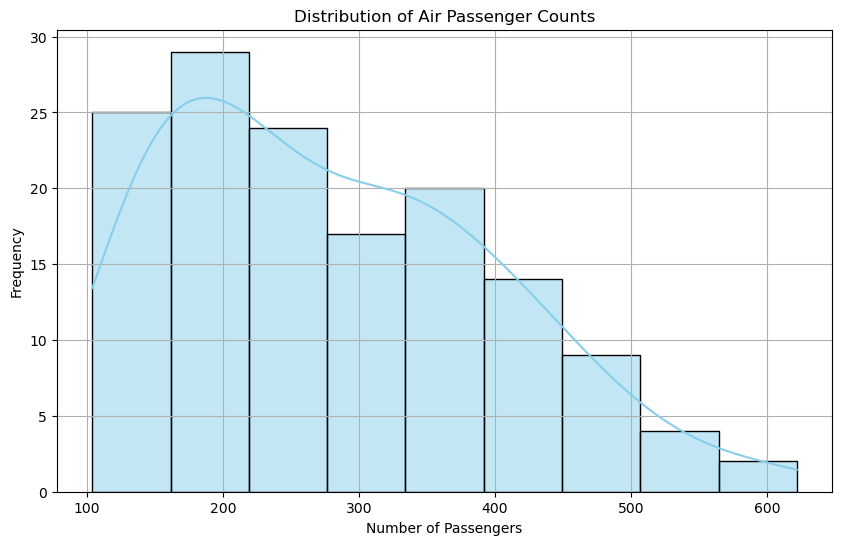

In [7]:
# Visualize the distribution of passenger counts
plt.figure(figsize=(10, 6))
sns.histplot(air_passengers['#Passengers'], kde=True, color='skyblue')
plt.title('Distribution of Air Passenger Counts')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Distribution Shape:** The distribution is right-skewed, indicating that most months have moderate passenger counts (150-300), with fewer high-passenger months (500+).

**Peak Frequency:** The highest frequency is observed around 200-250 passengers, making this range the most common.

**Insights:** The skewness suggests occasional peak travel seasons or events. The right tail may include potential anomalies or outliers that could be explored further.

# Plot the time series to visualize overall trends
### Monthly

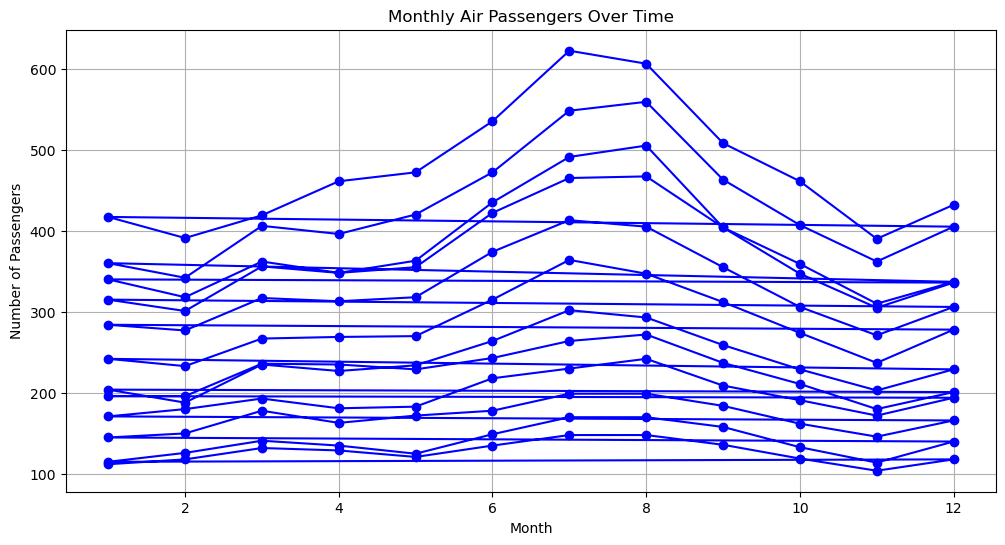

In [8]:
# Plot the time series to visualize overall trends
plt.figure(figsize=(12, 6))
plt.plot(air_passengers['month'], air_passengers['#Passengers'], color='blue', marker='o')
plt.title('Monthly Air Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

The above line chart shows a clear seasonal pattern, with peaks occurring around mid-year (July-August) and troughs around the start and end of the year (January-December).

Each year seems to have a similar pattern in terms of seasonal peaks and troughs, suggesting strong seasonality.

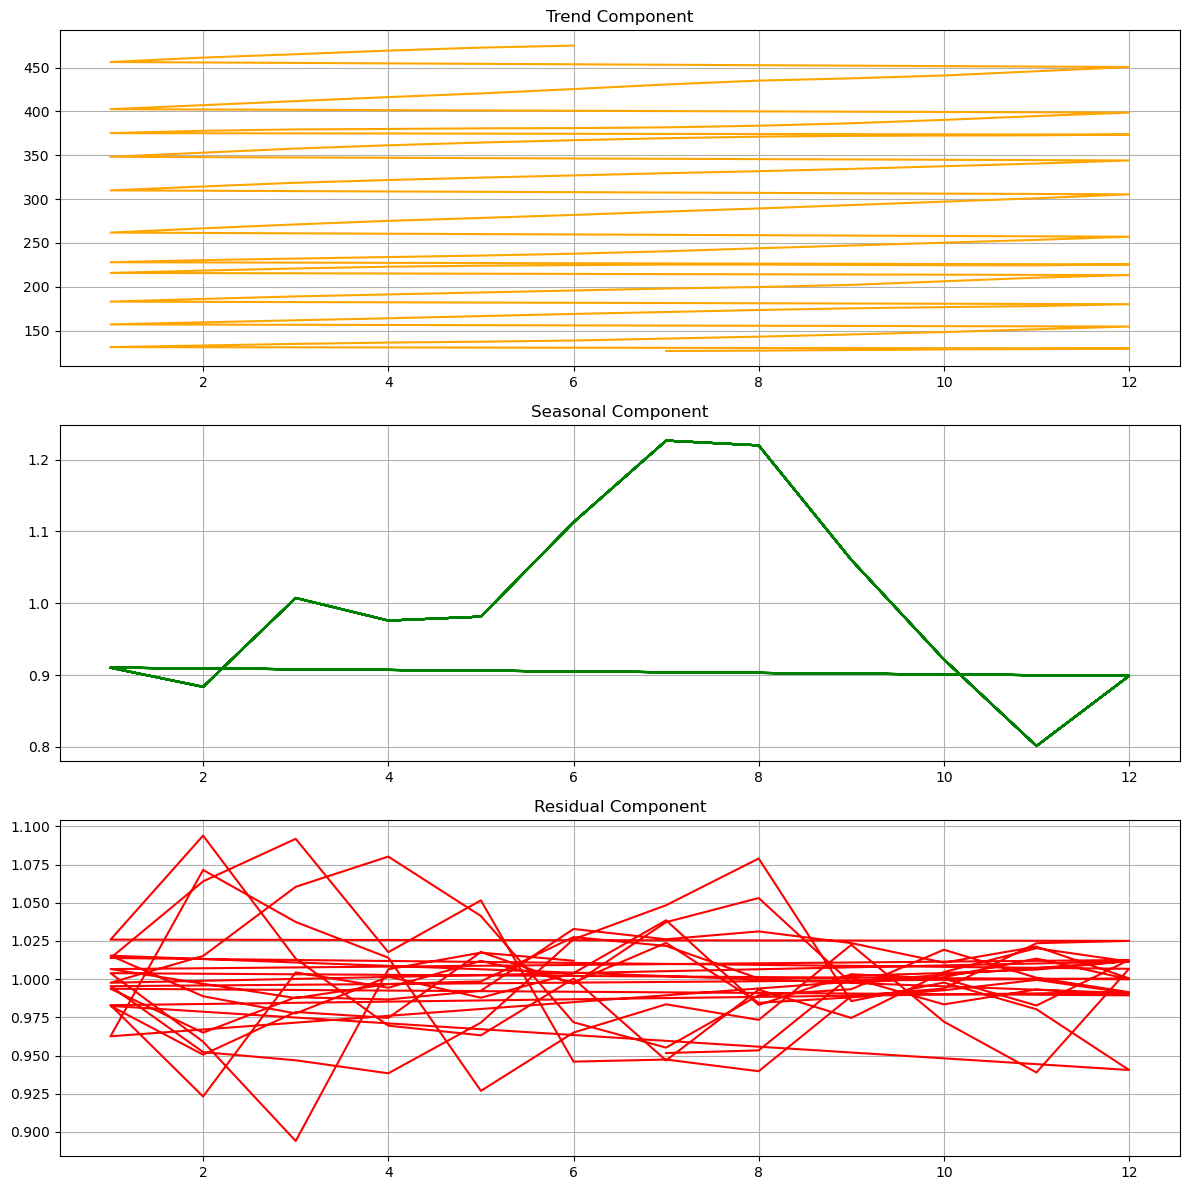

In [9]:
airpassenger_data = air_passengers.copy()

# Set Month as the index to create a time series object
airpassenger_data.set_index('month', inplace=True)

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(airpassenger_data['#Passengers'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

ax1.plot(decomposition.trend, label='Trend', color='orange')
ax1.set_title('Trend Component')
ax1.grid(True)

ax2.plot(decomposition.seasonal, label='Seasonality', color='green')
ax2.set_title('Seasonal Component')
ax2.grid(True)

ax3.plot(decomposition.resid, label='Residual', color='red')
ax3.set_title('Residual Component')
ax3.grid(True)

# Show all subplots
plt.tight_layout()
plt.show()

**Trend Component:** The trend component is relatively flat.

**Seasonal Component:** The seasonal component displays the monthly variations, with July and August showing peaks, while January and December show troughs. Reinforcing our previous seasionality insight.

**Residual Component:** The residual component appears relatively flat, indicating that most variations in the original time series are captured by the trend and seasonal components. Some minor fluctuations suggest occasional deviations from the expected pattern.

### Overall Insights

* The monthly and yearly time series show clear trends and seasonality.

* The decomposition shows that the overall increase in passenger counts rusulting mostly in a positive trend, while seasonal fluctuations stays relatively stable over the years.

### Yearly

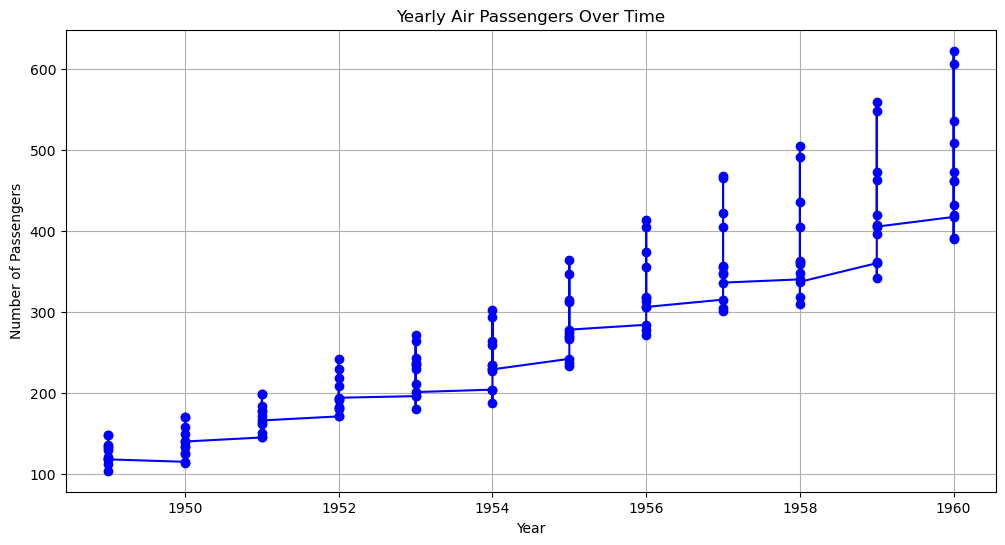

In [10]:
# Plot the time series to visualize overall trends
plt.figure(figsize=(12, 6))
plt.plot(air_passengers['year'], air_passengers['#Passengers'], color='blue', marker='o')
plt.title('Yearly Air Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

The yearly plot shows a consistent increase in the number of passengers over the years.

There are notable increases in the variance of passenger counts as well, suggesting increased fluctuations in demand over time. Each year shows a clear peak, typically occurring around mid-year.

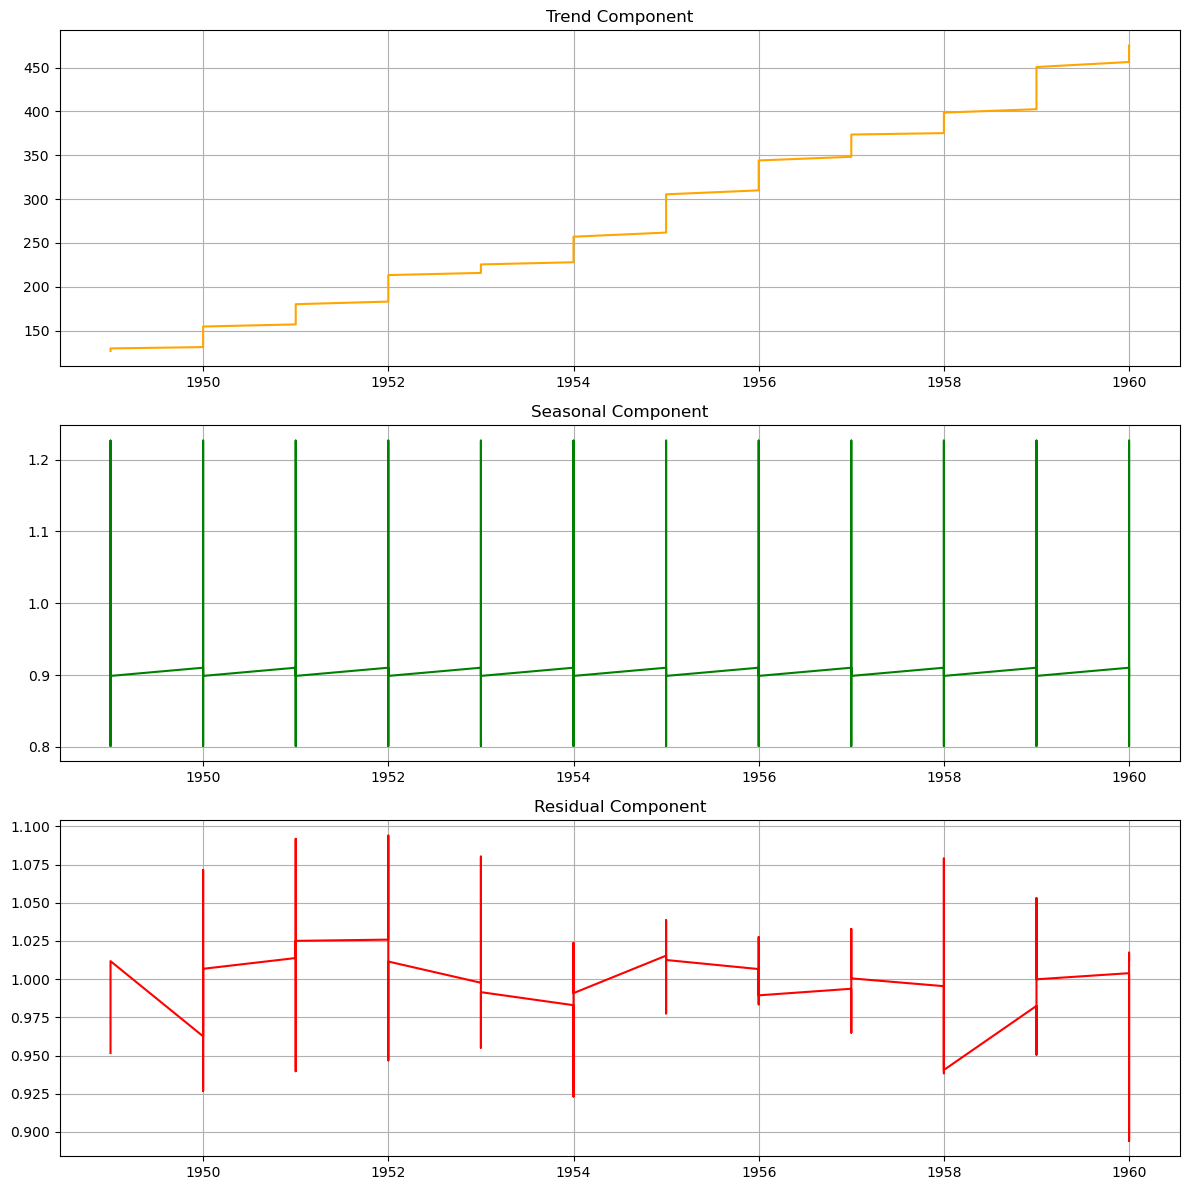

In [11]:
# Set Month as the index to create a time series object
airpassenger_data.set_index('year', inplace=True)

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(airpassenger_data['#Passengers'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

ax1.plot(decomposition.trend, label='Trend', color='orange')
ax1.set_title('Trend Component')
ax1.grid(True)

ax2.plot(decomposition.seasonal, label='Seasonality', color='green')
ax2.set_title('Seasonal Component')
ax2.grid(True)

ax3.plot(decomposition.resid, label='Residual', color='red')
ax3.set_title('Residual Component')
ax3.grid(True)

# Show all subplots
plt.tight_layout()
plt.show()

**Trend component:** Shows a clear stepwise increase, indicating periods of steady growth in passenger counts. This stepwise pattern may indicate periods of economic growth or increased airline capacity, leading to sudden jumps in passenger numbers.

**Seasonal component:** Shows regular yearly fluctuations, with peaks and troughs occurring at the same points each year. This once again reflects the seasonality observed in the monthly analysis, where mid-year months show the highest demand.

**Residual component:** Shows some deviation, particularly in the earlier years, indicating that not all variations are captured by the trend and seasonality.

## Modeling

In [12]:
# Split the data into train and test sets
train = air_passengers.iloc[:-12]  # All data except the last 12 months
test = air_passengers.iloc[-12:]   # Last 12 months

#### Create the ARIMA model

In [13]:
# Fit ARIMA model on train set
arima_model = ARIMA(train['#Passengers'], order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=12)  # Forecast for 12 months

#### Create the Exponential Smoothing model

In [14]:
# Fit Exponential Smoothing model on train set
exp_smooth = ExponentialSmoothing(train['#Passengers'], seasonal='multiplicative', seasonal_periods=12)
exp_smooth_fit = exp_smooth.fit()
exp_smooth_forecast = exp_smooth_fit.forecast(steps=12)

#### Create the Prophet model

In [15]:
# Fit Prophet model on train set
prophet_train = train.reset_index().rename(columns={'date': 'ds', '#Passengers': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_train)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
prophet_forecast = prophet_model.predict(future)
prophet_forecast_values = prophet_forecast['yhat'].iloc[-12:].values  # Last 12 values

23:38:02 - cmdstanpy - INFO - Chain [1] start processing
23:38:02 - cmdstanpy - INFO - Chain [1] done processing


### Comparison DF

In [21]:
# Create a new DataFrame for comparison
comparison_df = test[['date','#Passengers']].copy()
comparison_df['ARIMA_Prediction'] = arima_forecast.values
comparison_df['Exponential_Smoothing_Prediction'] = exp_smooth_forecast.values
comparison_df['Prophet_Prediction'] = prophet_forecast_values

### Visualize predictions

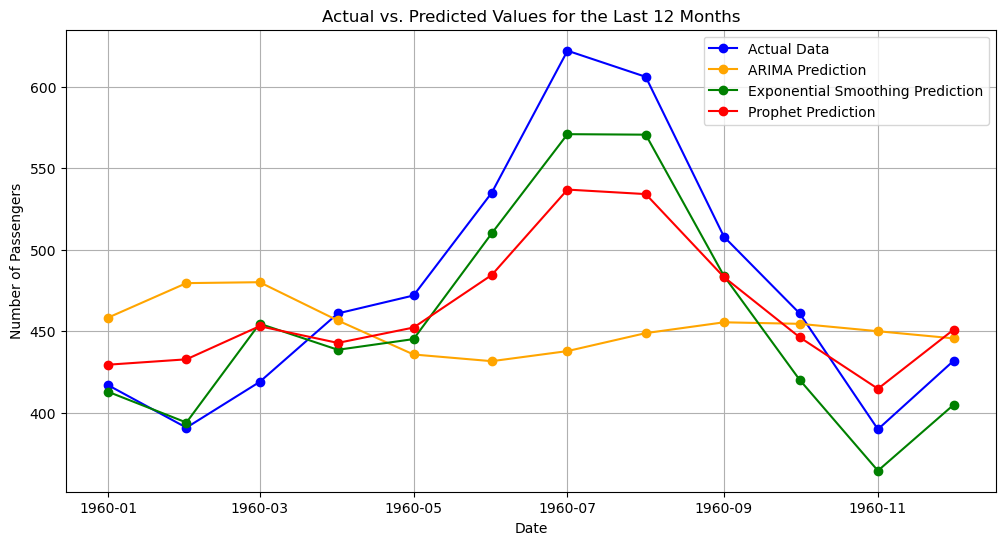

In [23]:
# Plot actual vs. predicted values for the last 12 months
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['date'], comparison_df['#Passengers'], label='Actual Data', color='blue', marker='o')
plt.plot(comparison_df['date'], comparison_df['ARIMA_Prediction'], label='ARIMA Prediction', color='orange', marker='o')
plt.plot(comparison_df['date'], comparison_df['Exponential_Smoothing_Prediction'], label='Exponential Smoothing Prediction', color='green', marker='o')
plt.plot(comparison_df['date'], comparison_df['Prophet_Prediction'], label='Prophet Prediction', color='red', marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Actual vs. Predicted Values for the Last 12 Months')
plt.legend()
plt.grid(True)
plt.show()

#### Evaluate accuracy using RMSE, MAE, and MAPE

In [24]:
# Calculate evaluation metrics
def evaluate_forecast(actual, forecast):
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mae = mean_absolute_error(actual, forecast)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return rmse, mae, mape

# Evaluate each model
arima_rmse, arima_mae, arima_mape = evaluate_forecast(test['#Passengers'], arima_forecast)
exp_rmse, exp_mae, exp_mape = evaluate_forecast(test['#Passengers'], exp_smooth_forecast)
prophet_rmse, prophet_mae, prophet_mape = evaluate_forecast(test['#Passengers'], prophet_forecast_values)

# Print the evaluation results
print(f"ARIMA: RMSE = {arima_rmse:.2f}, MAE = {arima_mae:.2f}, MAPE = {arima_mape:.2f}%")
print(f"Exponential Smoothing: RMSE = {exp_rmse:.2f}, MAE = {exp_mae:.2f}, MAPE = {exp_mape:.2f}%")
print(f"Prophet: RMSE = {prophet_rmse:.2f}, MAE = {prophet_mae:.2f}, MAPE = {prophet_mape:.2f}%")

ARIMA: RMSE = 86.81, MAE = 67.39, MAPE = 13.41%
Exponential Smoothing: RMSE = 29.74, MAE = 26.71, MAPE = 5.49%
Prophet: RMSE = 41.38, MAE = 34.75, MAPE = 6.98%


**Exponential Smoothing** outperforms both ARIMA and Prophet models based on all three evaluation metrics (RMSE, MAE, and MAPE). It is best suited for this dataset, likely due to its ability to handle seasonality and trends effectively.

**Prophet** performs moderately well but has higher error values compared to Exponential Smoothing.

**ARIMA** has the highest error values among the three models, indicating it may not be well-suited for capturing the seasonal patterns in the data.
Overall, Exponential Smoothing appears to be the most reliable model for forecasting air passenger counts in this dataset.

#### Create autocorrelation and partial autocorrelation plots

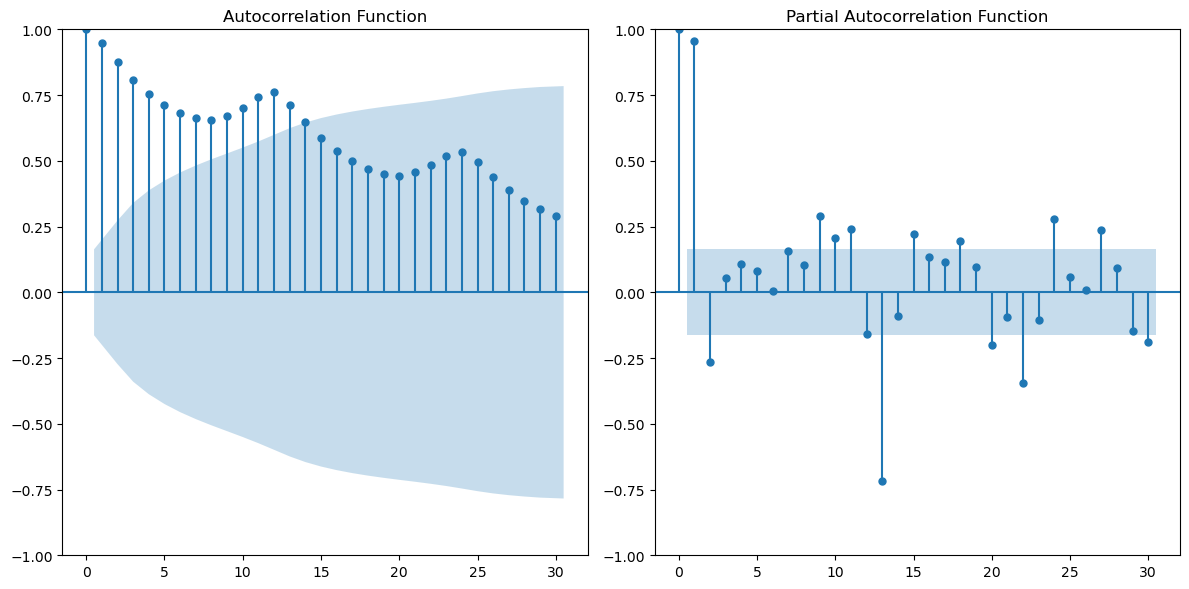

In [34]:
# ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(air_passengers['#Passengers'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(air_passengers['#Passengers'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()


#### Moving Average to remove trend and visualize patterns

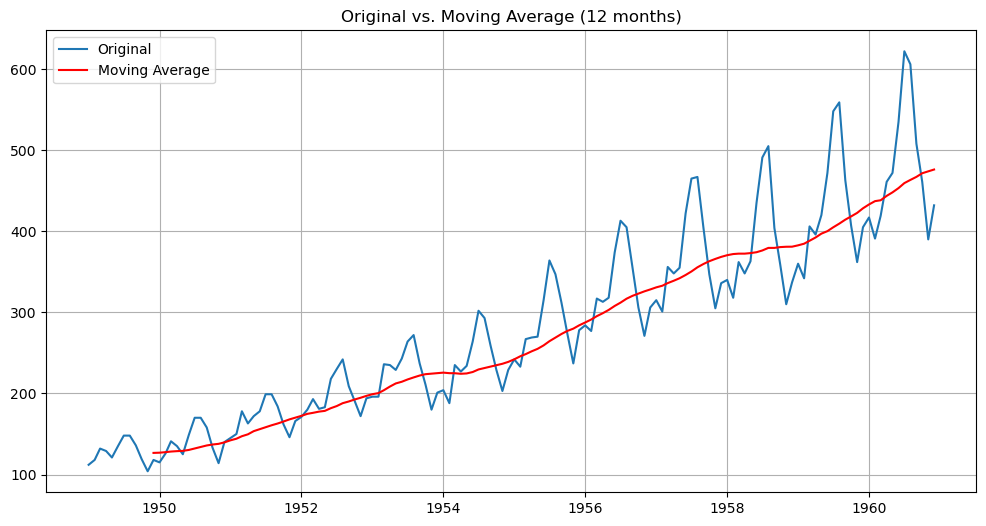

In [33]:
# Calculate the moving average
air_passengers['Moving_Avg'] = air_passengers['#Passengers'].rolling(window=12).mean()

# Plot original vs. moving average
plt.figure(figsize=(12, 6))
plt.plot(air_passengers['#Passengers'], label='Original')
plt.plot(air_passengers['Moving_Avg'], label='Moving Average', color='red')
plt.title('Original vs. Moving Average (12 months)')
plt.legend()
plt.grid(True)
plt.show()

### Outlier detection

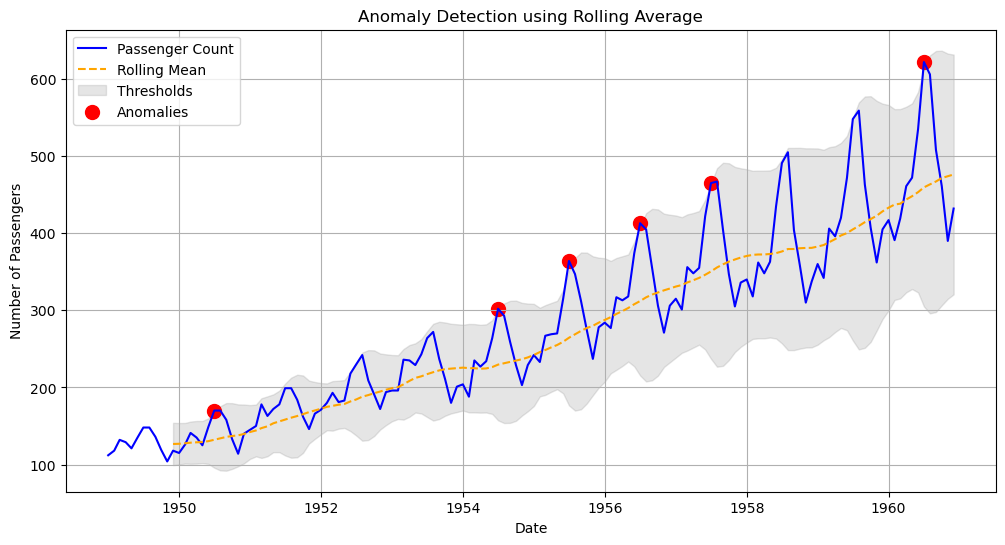

In [32]:
# Calculate the rolling mean and standard deviation
air_passengers['Rolling_Mean'] = air_passengers['#Passengers'].rolling(window=12).mean()
air_passengers['Rolling_Std'] = air_passengers['#Passengers'].rolling(window=12).std()

# Define upper and lower thresholds based on standard deviation
air_passengers['Upper_Threshold'] = air_passengers['Rolling_Mean'] + 2 * air_passengers['Rolling_Std']
air_passengers['Lower_Threshold'] = air_passengers['Rolling_Mean'] - 2 * air_passengers['Rolling_Std']

# Identify anomalies where the actual passenger count is outside the threshold bounds
air_passengers['Anomaly'] = ((air_passengers['#Passengers'] > air_passengers['Upper_Threshold']) | 
                             (air_passengers['#Passengers'] < air_passengers['Lower_Threshold']))

# Filter the anomalies
anomalies = air_passengers[air_passengers['Anomaly']]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(air_passengers['#Passengers'], label='Passenger Count', color='blue')
plt.plot(air_passengers['Rolling_Mean'], label='Rolling Mean', color='orange', linestyle='--')
plt.fill_between(air_passengers.index, air_passengers['Upper_Threshold'], air_passengers['Lower_Threshold'], 
                 color='gray', alpha=0.2, label='Thresholds')
plt.scatter(anomalies.index, anomalies['#Passengers'], color='red', label='Anomalies', s=100)
plt.title('Anomaly Detection using Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
print("Anomalies Detected:")
print(anomalies[['#Passengers', 'Rolling_Mean', 'Upper_Threshold', 'Lower_Threshold']])


Anomalies Detected:
            #Passengers  Rolling_Mean  Upper_Threshold  Lower_Threshold
date                                                                   
1950-07-01          170    132.166667       168.436698        95.896636
1954-07-01          302    229.583333       301.802486       157.364180
1955-07-01          364    264.416667       352.116395       176.716938
1956-07-01          413    312.000000       408.419538       215.580462
1957-07-01          465    350.416667       463.651606       237.181727
1960-07-01          622    459.416667       613.805687       305.027646


**Anomalies Detected:**
All anomalies occur in July during the years 1950, 1954, 1955, 1956, 1957, and 1960, indicating unusually high mid-year passenger counts.

**Relation to Patterns:**
These anomalies correspond to peak travel periods (summer months) and are consistent with seasonal spikes observed in the overall time series.

**Model Performance Comparison:**
Exponential Smoothing captured these seasonal peaks best, resulting in low RMSE and MAPE values.
ARIMA struggled to capture these anomalies, leading to higher errors.
Prophet performed moderately, capturing some peaks but not as accurately as Exponential Smoothing.

**Conclusion:**
The anomalies align with expected seasonal trends, and Exponential Smoothing was best suited to model these patterns. Future models should consider incorporating external seasonal factors for improved accuracy.

# AI Use

For this homework, I primarily relied on ChatGPT as my AI tool. 

It often helps me a lot to understand and break down complex concepts into smaller, manageable parts, which I could then piece together to improve my understanding. The explanations are detailed and easy to follow, and this approach significantly enhanced my learning experience lately.

Additionally, ChatGPT helps a lot on my writing. It helps me to articulate my ideas more clearly and concisely. There was a particular instance where I spent about 25 minutes trying to formulate an explanation. After using ChatGPT to refine it, the core meaning of my original response remained intact, but the clarity and brevity were improved a lot. And every time I use it, I ask tips to improve my writting as well.

Another area where ChatGPT helped was with data visualization. Previously, I would spend considerable time searching for the right code on platforms like StackOverflow to generate plots. With ChatGPT, I was able to speed up this process, quickly getting the necessary plotting code and visualizing the data more efficiently.